In [1]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp7C6sly/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp7C6sly/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp7C6sly/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp7C6sly/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp7C6sly/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp7C6sly/downloaded_packages


# STAGE 3
##  random combinations both varying both different

In [2]:
stage3 <-read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_3/stage3_regression_table.csv")

# Lasso

Loading required package: Matrix

Loaded glmnet 4.1-8



Best alpha: 0.6 
[1] 0.08644627



Call:
glm(formula = formula, data = stage3)

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.1783210  0.5100003   2.310 0.024262 *  
log(ellen_up)  0.2391975  0.0625266   3.826 0.000309 ***
ellen_rtt     -0.0017691  0.0004407  -4.014 0.000166 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.3129716)

    Null deviance: 27.743  on 63  degrees of freedom
Residual deviance: 19.091  on 61  degrees of freedom
AIC: 112.21

Number of Fisher Scoring iterations: 2


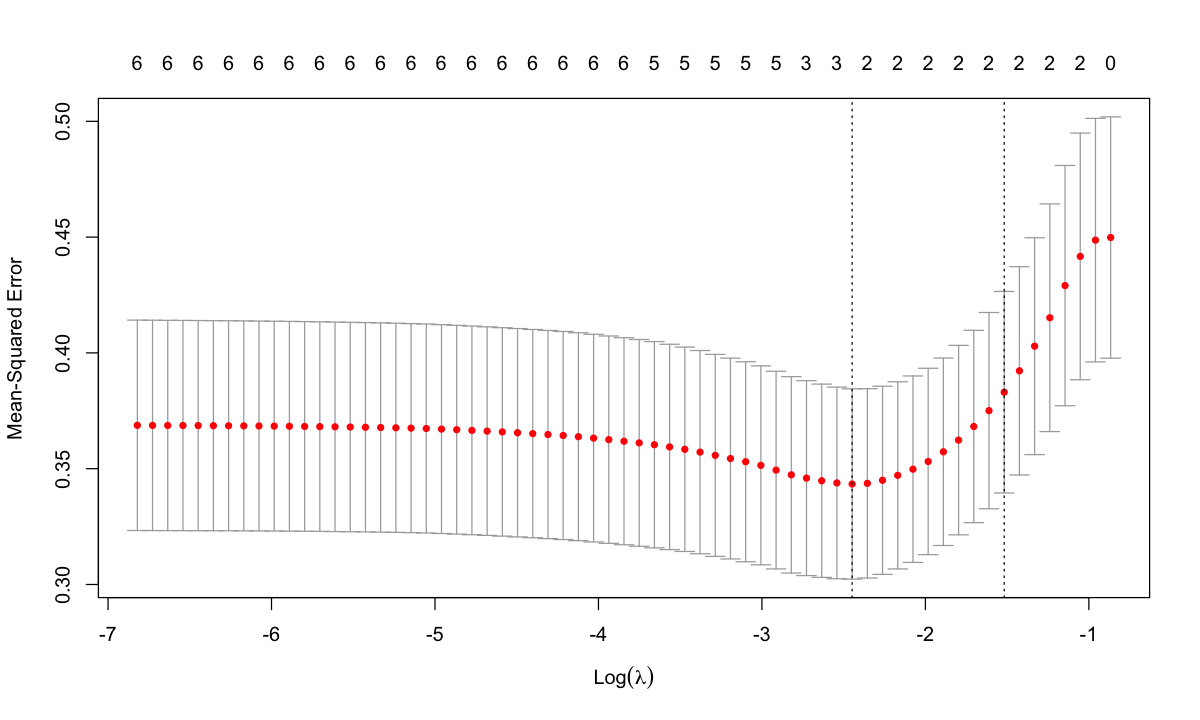

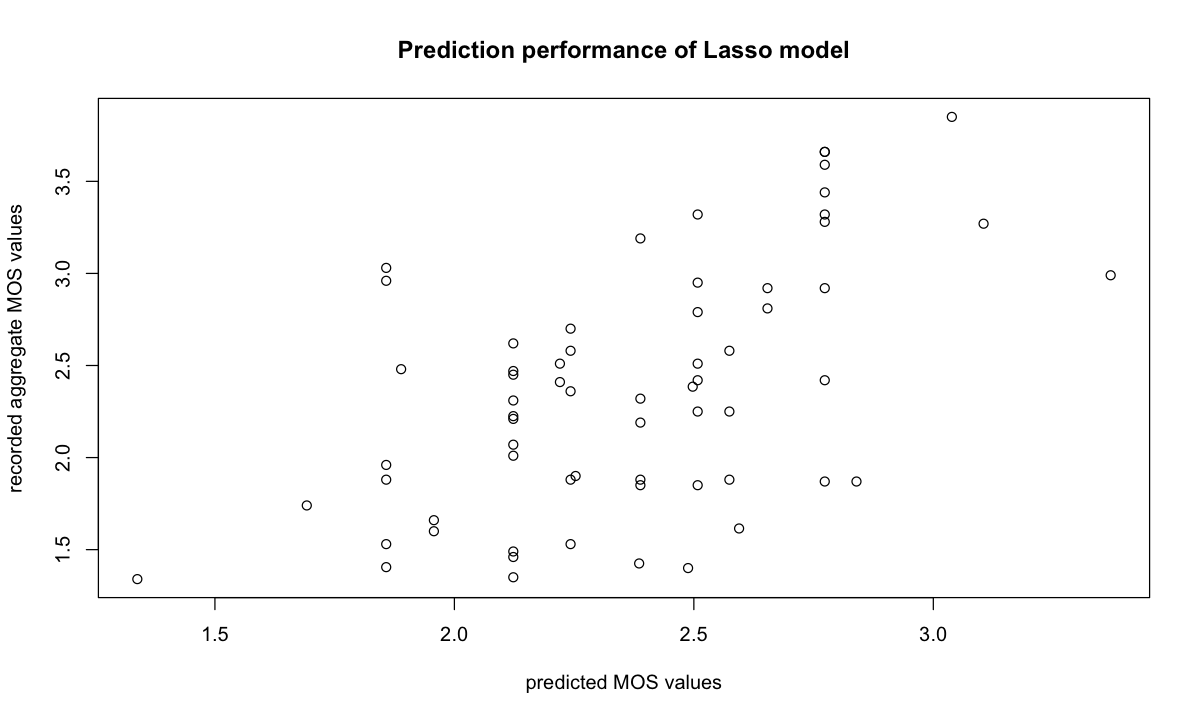

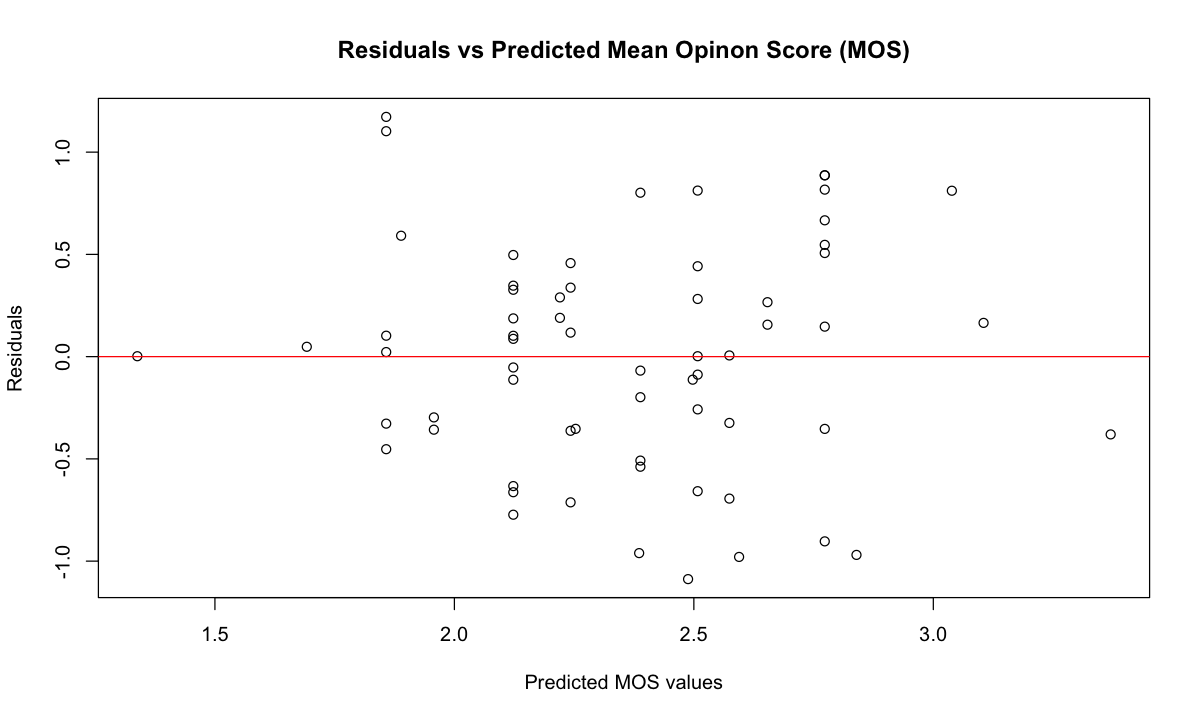

In [7]:
cv_alpha <- function(x, y, nfolds = 5) {
  alphas <- seq(0, 1, by = 0.1)
  cv_errors <- numeric(length(alphas))
  
  for (i in seq_along(alphas)) {
    fit <- cv.glmnet(x, y, alpha = alphas[i], nfolds = nfolds)
    cv_errors[i] <- min(fit$cvm)
  }
  
  best_alpha <- alphas[which.min(cv_errors)]
  return(best_alpha)}
stage3 <-read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_3/stage3_regression_table.csv")
library(glmnet)

# Prepare the data (ensure your response variable is numeric)
x <- model.matrix(agg_MOS ~ log(ellen_up) + log(ellen_down) + ellen_rtt 
+ log(aadya_up) + log(aadya_down) + aadya_rtt, data = stage3)

y <- stage3$agg_MOS

# Fit Lasso regression model (alpha = 1 for Lasso)
lasso_model <- glmnet(x, y, alpha = 1)
# Find the best alpha
best_alpha <- cv_alpha(x, y)
cat("Best alpha:", best_alpha, "\n")

# Fit the model with the best alpha
cv_model_best <- cv.glmnet(x, y, alpha = best_alpha)

# Plot the cross-validation curve
par(bg= "white")
plot(cv_model_best)

# Get the best lambda
best_lambda <- cv_model_best$lambda.min
print(best_lambda)

# Fit the final model with the best alpha and lambda
final_model_best <- glmnet(x, y, alpha = best_alpha, lambda = best_lambda)
selected_vars <- rownames(coef(final_model_best))[-1][coef(final_model_best)[-1, 1] != 0]

# Create a formula for the selected variables
formula <- as.formula(paste("agg_MOS ~", paste(selected_vars, collapse = " + ")))
lasso_model <- glm(formula, data = stage3)
summary(lasso_model)
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(lasso_model, stage3), stage3$agg_MOS, main="Prediction performance of Lasso model", ylab= "recorded aggregate MOS values", xlab="predicted MOS values")
plot(lasso_model$fitted.values, resid(lasso_model), 
     main = "Residuals vs Predicted Mean Opinon Score (MOS)", 
     xlab = "Predicted MOS values", 
     ylab = "Residuals")
abline(h = 0, col = "red")

# AIC

In [1]:
MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_3/stage3_regression_table.csv") 
#perform fit
fit <- lm(agg_MOS ~ log(aadya_up) + log(aadya_down) + aadya_rtt + log(ellen_up) + log(ellen_down) + ellen_rtt, MOS_test)
summary(fit)


Call:
lm(formula = agg_MOS ~ log(aadya_up) + log(aadya_down) + aadya_rtt + 
    log(ellen_up) + log(ellen_down) + ellen_rtt, data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08107 -0.38111  0.00831  0.36005  1.07028 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.8935510  1.1707142   0.763 0.448460    
log(aadya_up)   -0.0813071  0.0692955  -1.173 0.245540    
log(aadya_down)  0.0623397  0.0773788   0.806 0.423797    
aadya_rtt       -0.0003603  0.0003922  -0.919 0.362107    
log(ellen_up)    0.2672324  0.0666064   4.012 0.000177 ***
log(ellen_down)  0.0333139  0.0877575   0.380 0.705643    
ellen_rtt       -0.0018944  0.0004684  -4.045 0.000159 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5683 on 57 degrees of freedom
Multiple R-squared:  0.3365,	Adjusted R-squared:  0.2667 
F-statistic: 4.818 on 6 and 57 DF,  p-value: 0.0004867


Start:  AIC=-65.75
agg_MOS ~ log(aadya_up) + log(aadya_down) + aadya_rtt + log(ellen_up) + 
    log(ellen_down) + ellen_rtt

                  Df Sum of Sq    RSS     AIC
- log(ellen_down)  1    0.0465 18.454 -67.592
- log(aadya_down)  1    0.2096 18.617 -67.029
- aadya_rtt        1    0.2726 18.680 -66.812
- log(aadya_up)    1    0.4446 18.852 -66.226
<none>                         18.407 -65.753
- log(ellen_up)    1    5.1983 23.605 -51.834
- ellen_rtt        1    5.2832 23.690 -51.604

Step:  AIC=-67.59
agg_MOS ~ log(aadya_up) + log(aadya_down) + aadya_rtt + log(ellen_up) + 
    ellen_rtt

                  Df Sum of Sq    RSS     AIC
- log(aadya_down)  1    0.1928 18.646 -68.926
- aadya_rtt        1    0.2370 18.691 -68.775
- log(aadya_up)    1    0.4012 18.855 -68.215
<none>                         18.454 -67.592
- log(ellen_up)    1    5.1523 23.606 -53.832
- ellen_rtt        1    5.2368 23.691 -53.604

Step:  AIC=-68.93
agg_MOS ~ log(aadya_up) + aadya_rtt + log(ellen_up) + ellen


Call:
lm(formula = agg_MOS ~ log(ellen_up) + ellen_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0879 -0.3585  0.0141  0.3398  1.1724 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.1783210  0.5100003   2.310 0.024262 *  
log(ellen_up)  0.2391975  0.0625266   3.826 0.000309 ***
ellen_rtt     -0.0017691  0.0004407  -4.014 0.000166 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5594 on 61 degrees of freedom
Multiple R-squared:  0.3118,	Adjusted R-squared:  0.2893 
F-statistic: 13.82 on 2 and 61 DF,  p-value: 1.121e-05


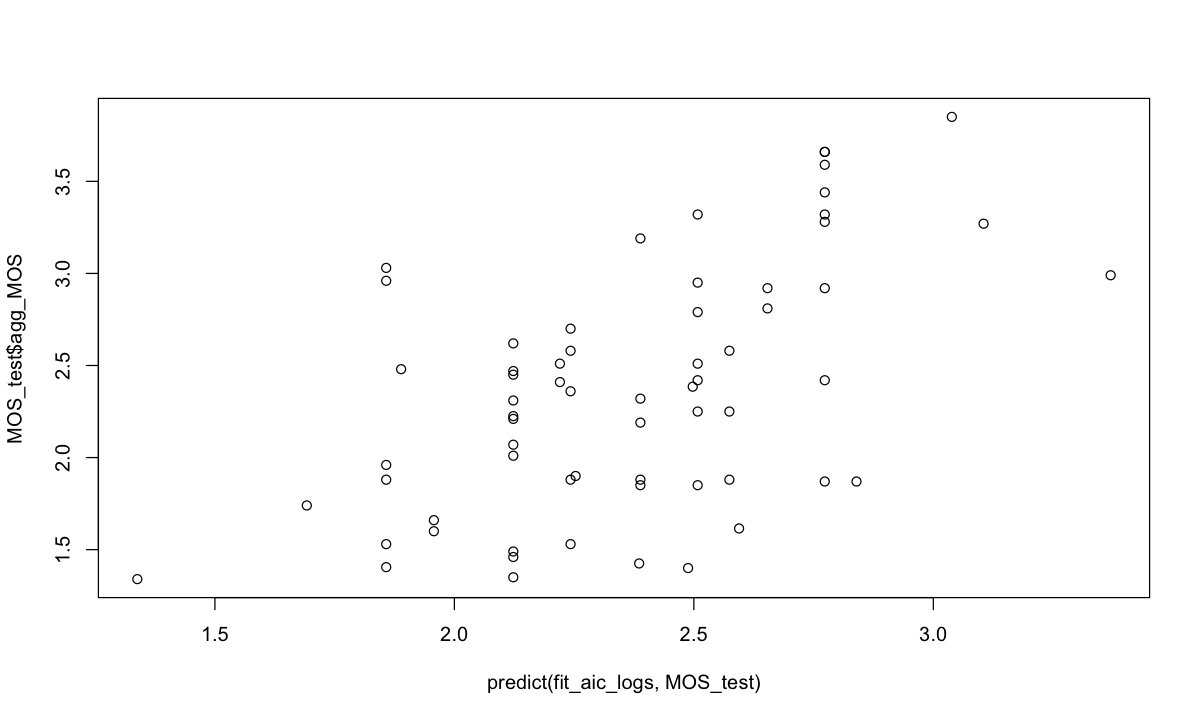

In [10]:
fit_aic_logs <- step(fit)
summary(fit_aic_logs)
par(bg = "white")
plot(predict(fit_aic_logs, MOS_test), MOS_test$agg_MOS)

# Exploratory

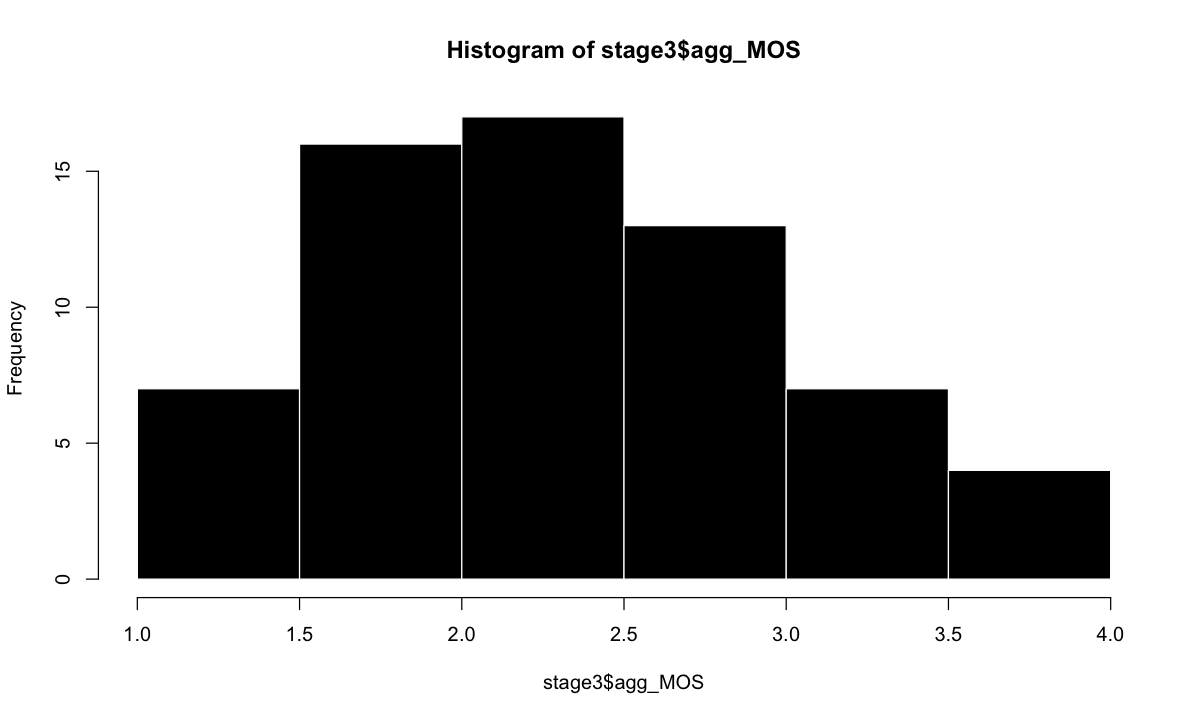

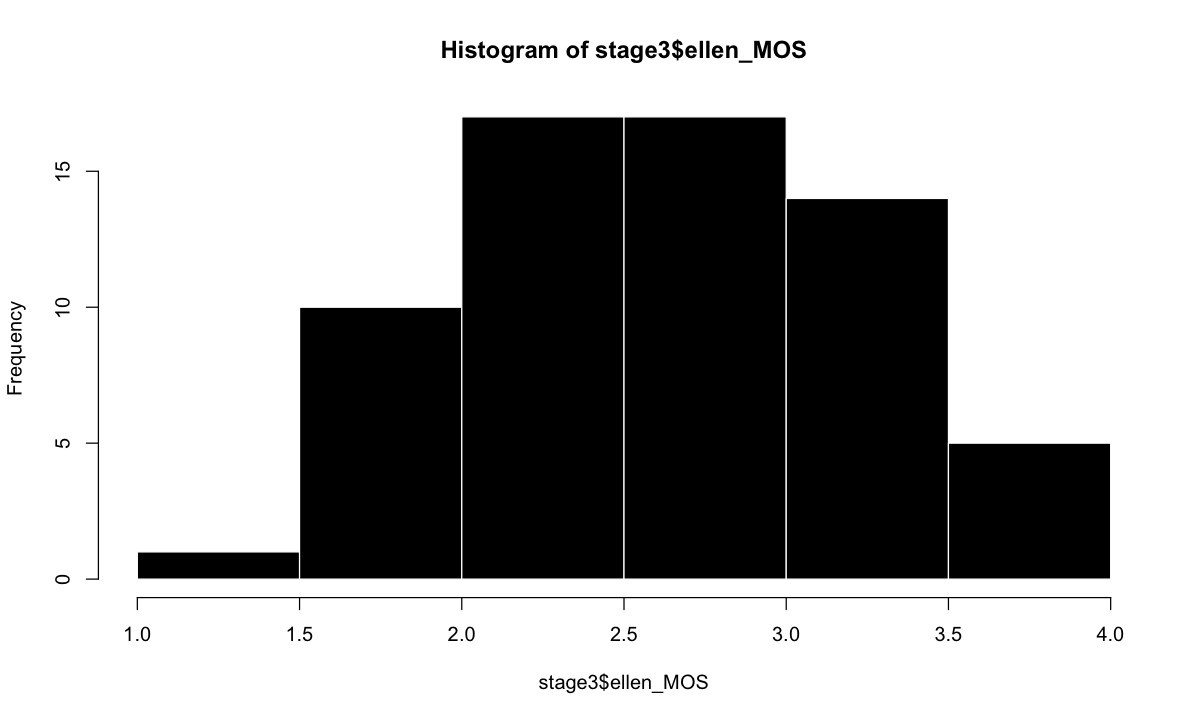

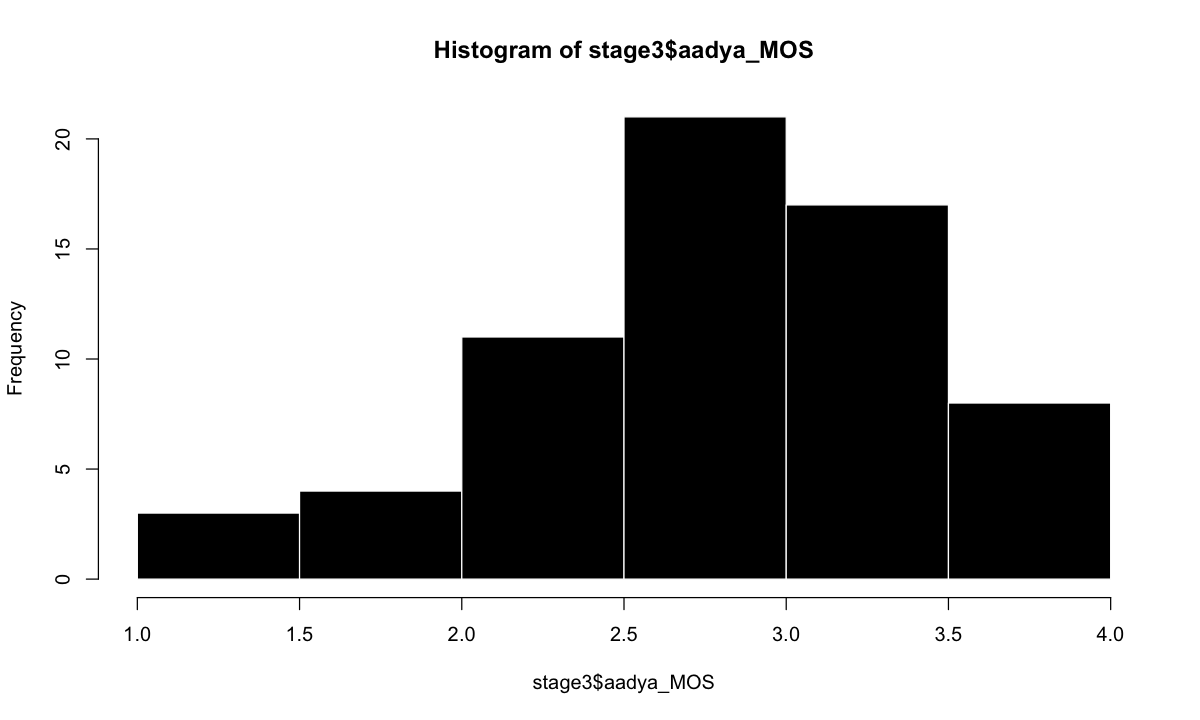

In [3]:
options(repr.plot.width = 10, repr.plot.height = 6)

par(bg = "white")
hist(stage3$agg_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(stage3$ellen_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(stage3$aadya_MOS, 
     col = "black",
     border = "white")

In [4]:
MOS_test<- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_3/stage3_regression_table.csv")

In [5]:
plot_vars_against_targ <- function(target, target_name) {
  library(ggplot2)
  #import data
  MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_3/stage3_regression_table.csv") 
  #perform fit
  fit <- lm(target ~ log(aadya_up) + log(aadya_down) + aadya_rtt + log(ellen_up) + log(ellen_down) + ellen_rtt, MOS_test)
  #print summary of variables and significance
  print(summary(fit))

  #set up plotting environment
  options(repr.plot.width = 10, repr.plot.height = 6) #fix size
  par(bg = "white")  # set background color to white

  # Scatter plot for aadya_up
  p1 <- ggplot(MOS_test, aes(x = aadya_up, y = target)) +
    geom_point(color = "blue") +
    labs(title = paste(target_name, "vs aadya_up"), x = "aadya_up", y = target_name) +
    theme_minimal()
  print(p1)
  p2 <- ggplot(MOS_test, aes(x = aadya_down, y = target)) +
    geom_point(color = "purple") +
    labs(title = paste(target_name, "vs aadya_down"), x = "aadya_down", y = target_name) +
    theme_minimal()
  print(p2)
  p3 <- ggplot(MOS_test, aes(x = aadya_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs aadya_rtt"), x = "aadya_rtt", y = target_name) +
    theme_minimal()
  print(p3)
  p4 <- ggplot(MOS_test, aes(x = ellen_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs ellen_rtt"), x = "ellen_rtt", y = target_name) +
    theme_minimal()
  print(p4)
  p5 <- ggplot(MOS_test, aes(x = ellen_up, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs ellen_up"), x = "ellen_up", y = target_name) +
    theme_minimal()
  print(p5)
  p6 <- ggplot(MOS_test, aes(x = ellen_down, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs ellen_down"), x = "ellen_down", y = target_name) +
    theme_minimal()
  print(p6)
  #plots the predicted values against the real values for each datapoint
  predictions <- predict(fit, MOS_test)
  plot(predict(fit, MOS_test), target, main= paste("model performance for", target_name))
}


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt + 
    log(ellen_up) + log(ellen_down) + ellen_rtt, data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08107 -0.38111  0.00831  0.36005  1.07028 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.8935510  1.1707142   0.763 0.448460    
log(aadya_up)   -0.0813071  0.0692955  -1.173 0.245540    
log(aadya_down)  0.0623397  0.0773788   0.806 0.423797    
aadya_rtt       -0.0003603  0.0003922  -0.919 0.362107    
log(ellen_up)    0.2672324  0.0666064   4.012 0.000177 ***
log(ellen_down)  0.0333139  0.0877575   0.380 0.705643    
ellen_rtt       -0.0018944  0.0004684  -4.045 0.000159 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5683 on 57 degrees of freedom
Multiple R-squared:  0.3365,	Adjusted R-squared:  0.2667 
F-statistic: 4.818 on 6 and 57 DF,  p-value: 0.0004867



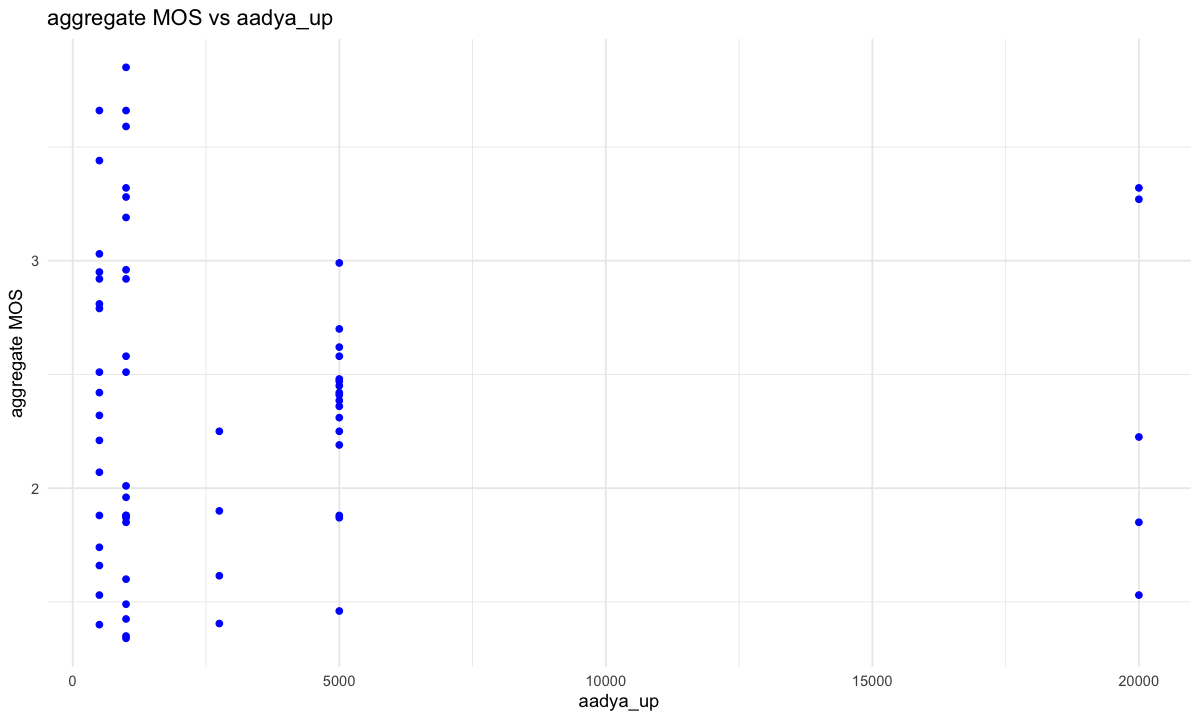

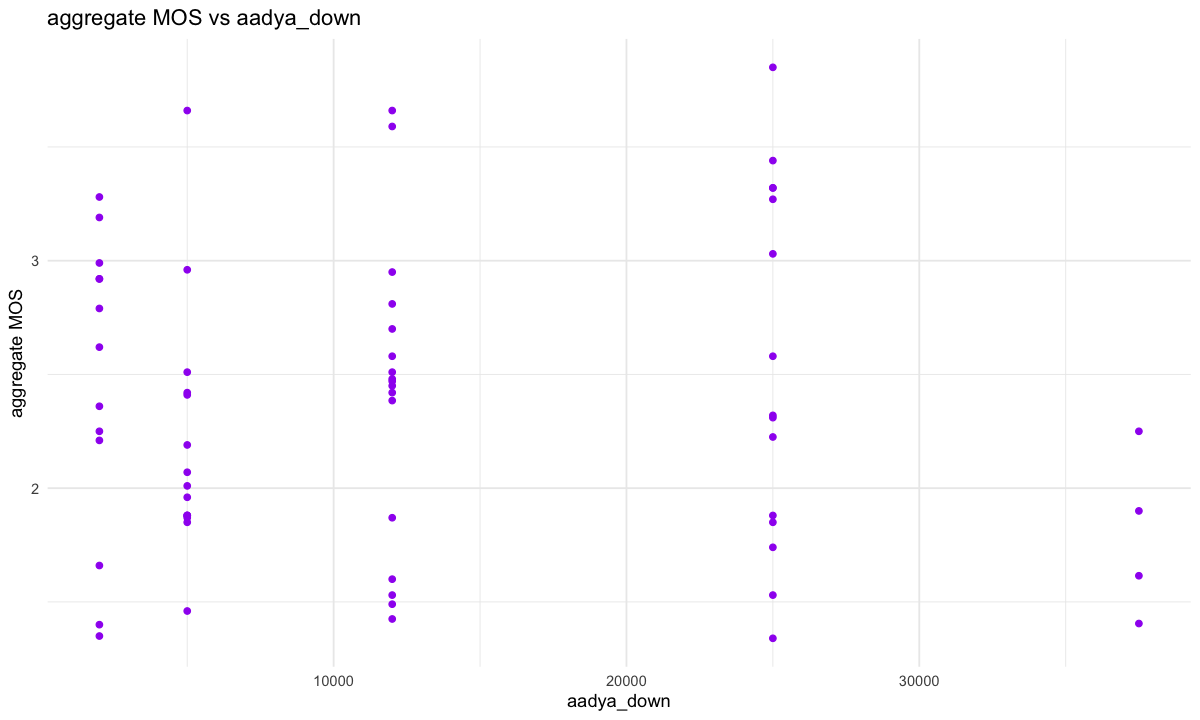

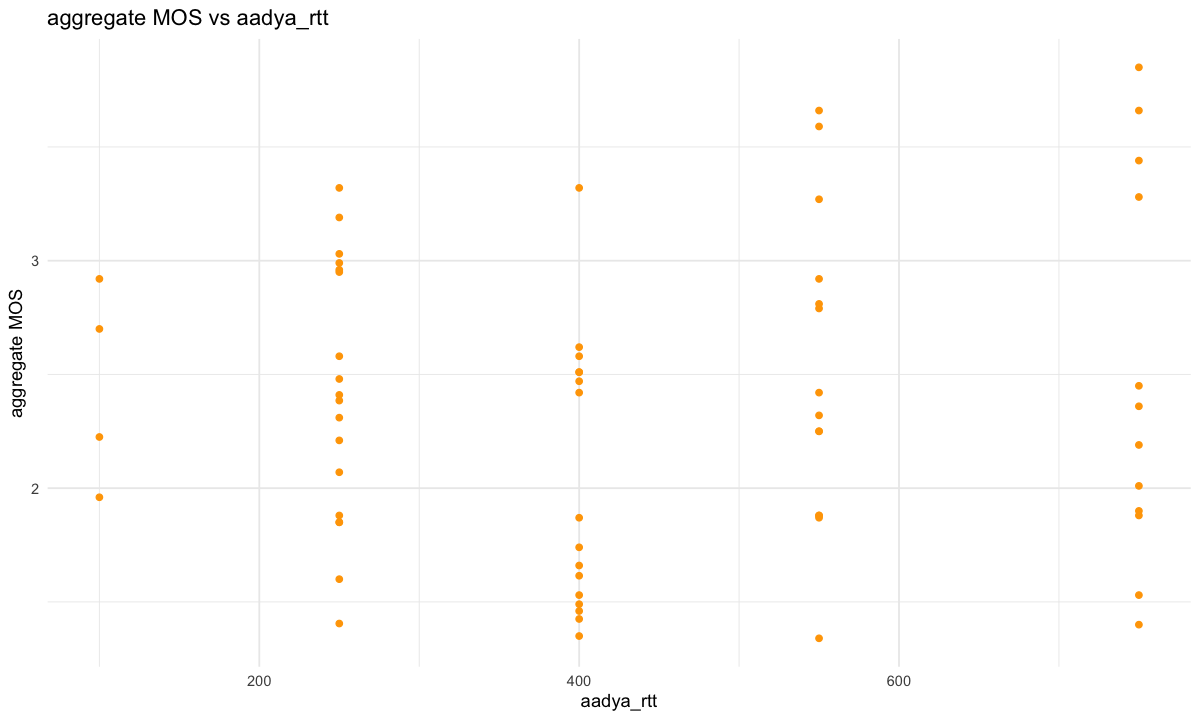

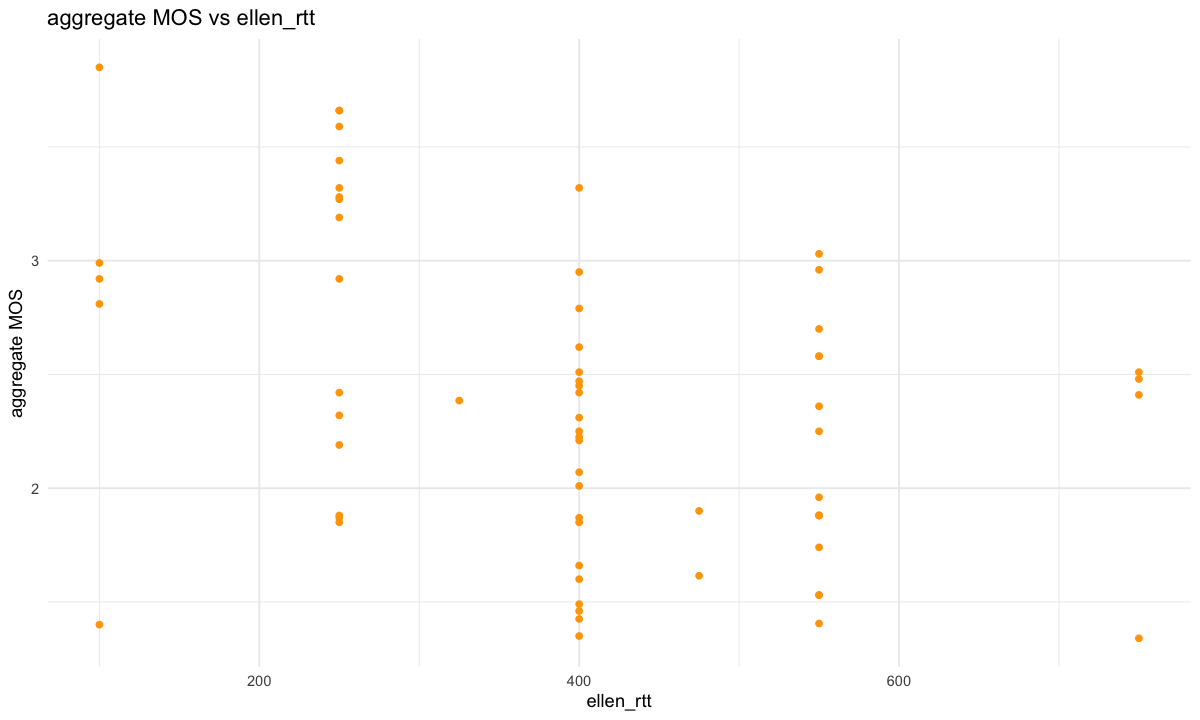

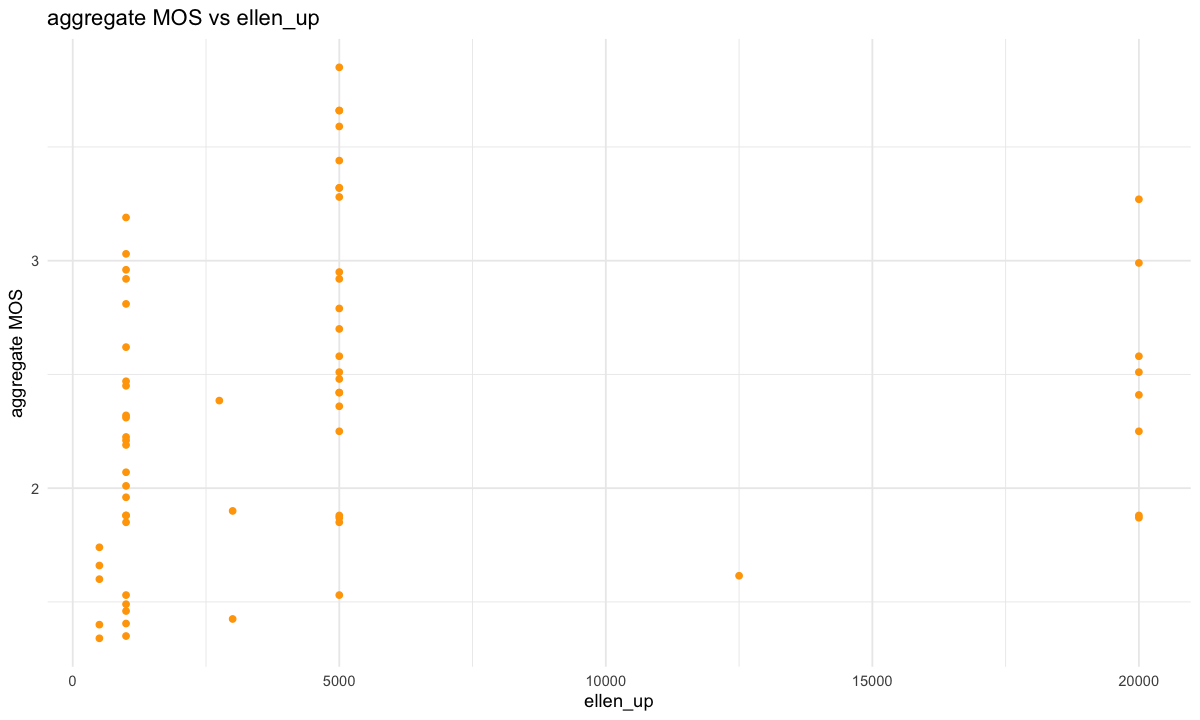

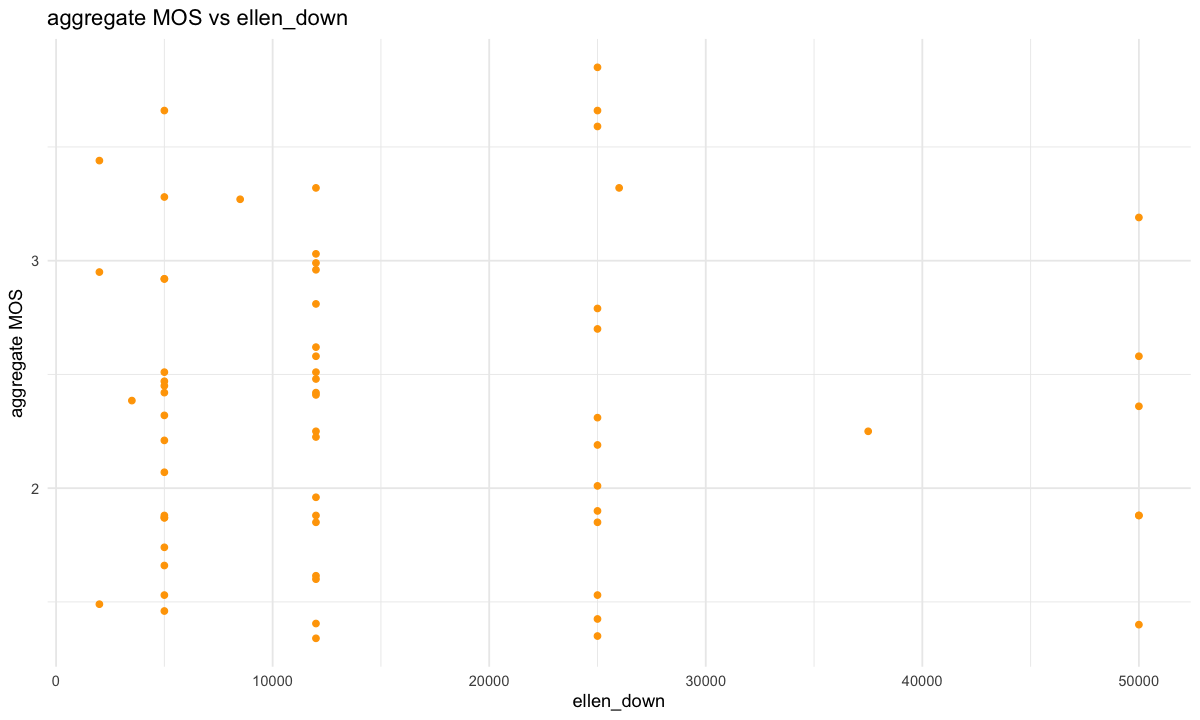

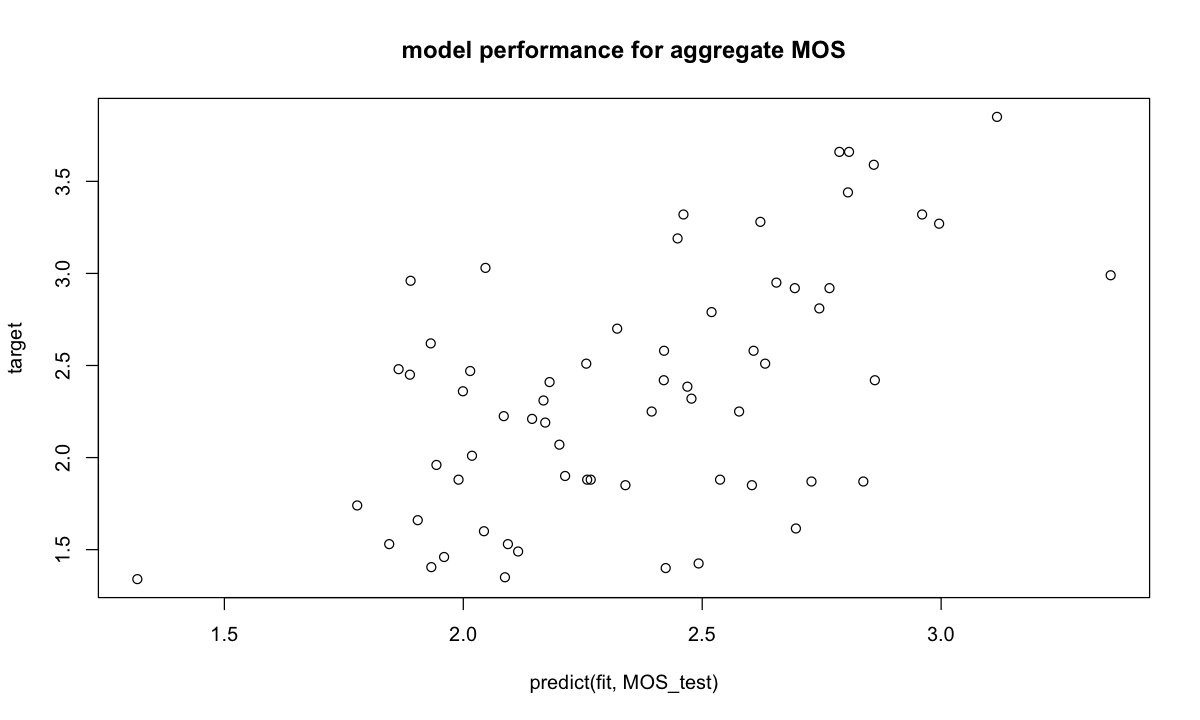

In [6]:
plot_vars_against_targ(MOS_test$agg_MOS, "aggregate MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt + 
    log(ellen_up) + log(ellen_down) + ellen_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2062 -0.4324 -0.1006  0.4704  1.0179 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.6199085  1.2698829   0.488   0.6273    
log(aadya_up)   -0.0569526  0.0751654  -0.758   0.4518    
log(aadya_down)  0.1125017  0.0839334   1.340   0.1854    
aadya_rtt        0.0001038  0.0004254   0.244   0.8080    
log(ellen_up)    0.1695451  0.0722485   2.347   0.0224 *  
log(ellen_down)  0.0618167  0.0951912   0.649   0.5187    
ellen_rtt       -0.0023930  0.0005080  -4.710 1.63e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6164 on 57 degrees of freedom
Multiple R-squared:  0.3332,	Adjusted R-squared:  0.263 
F-statistic: 4.747 on 6 and 57 DF,  p-value: 0.0005513



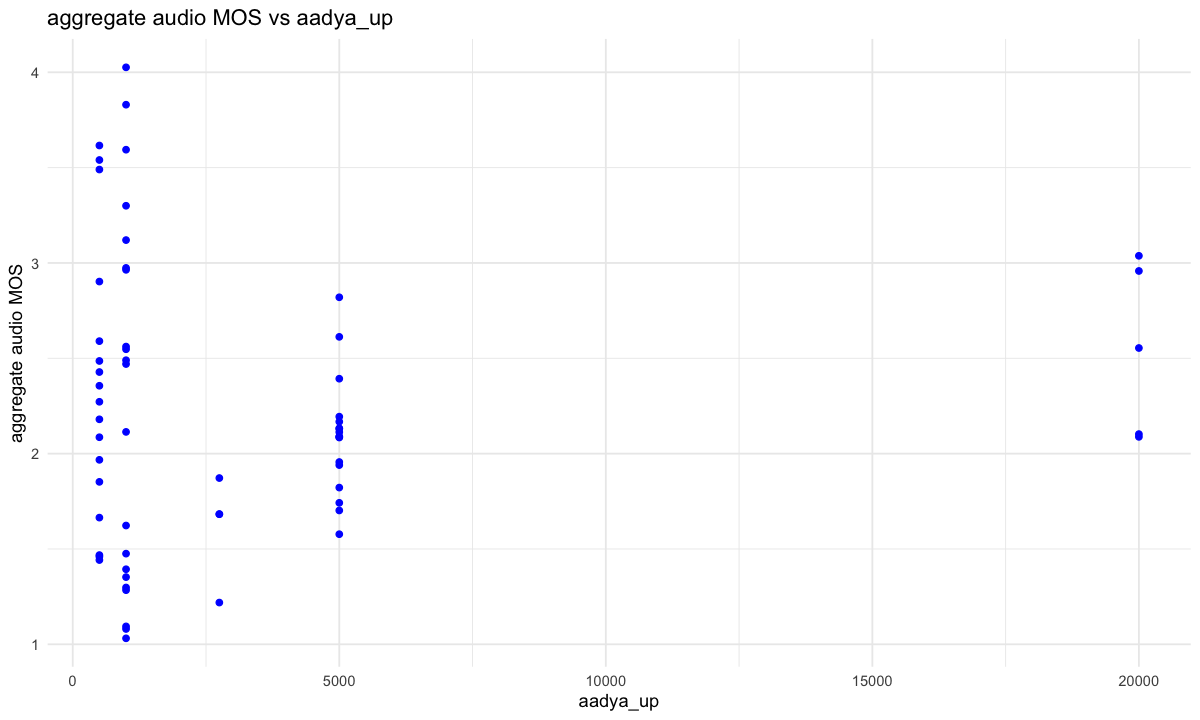

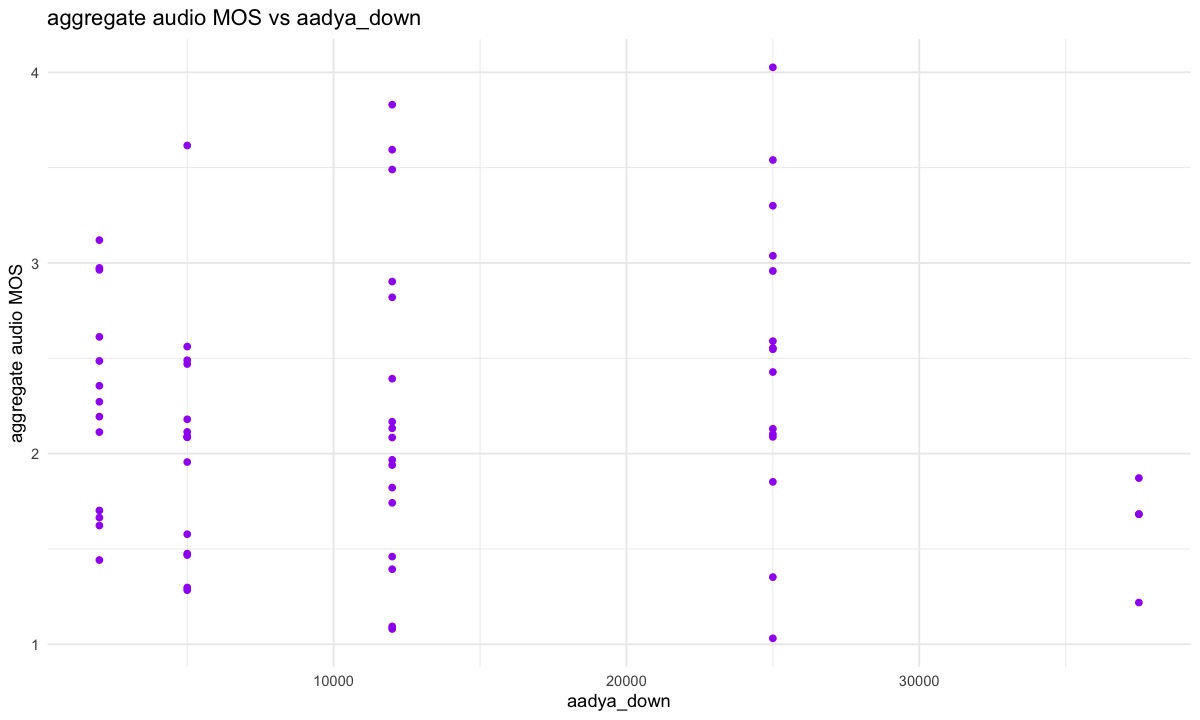

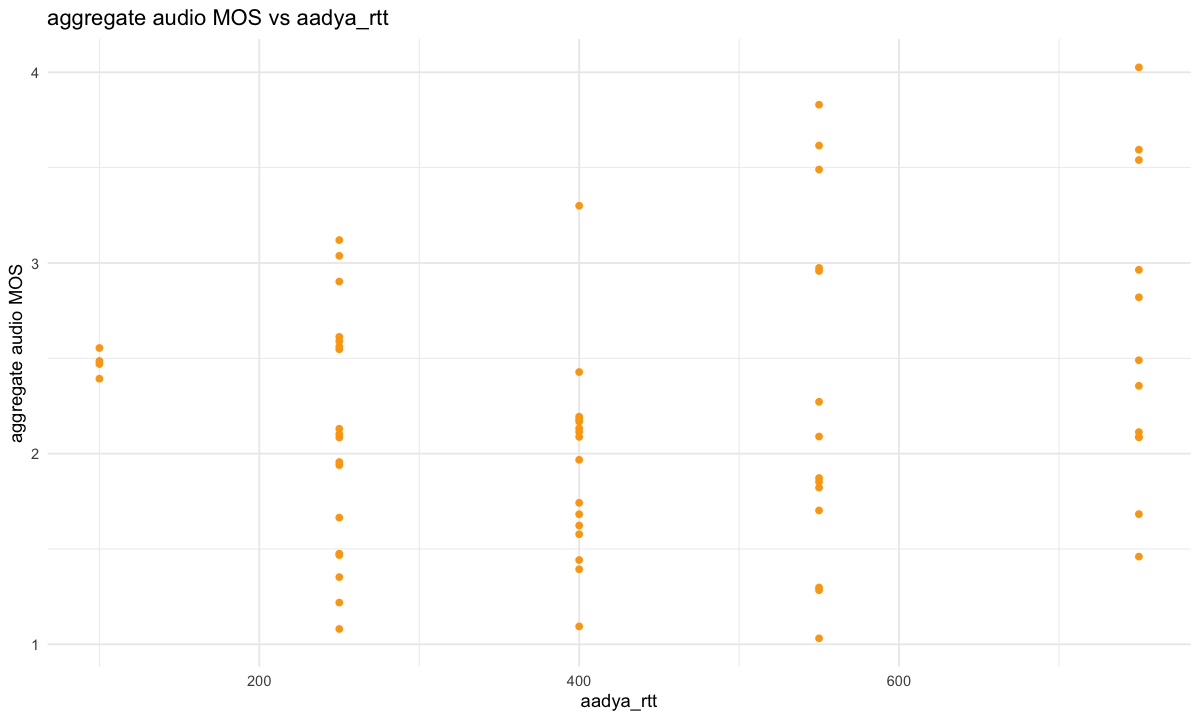

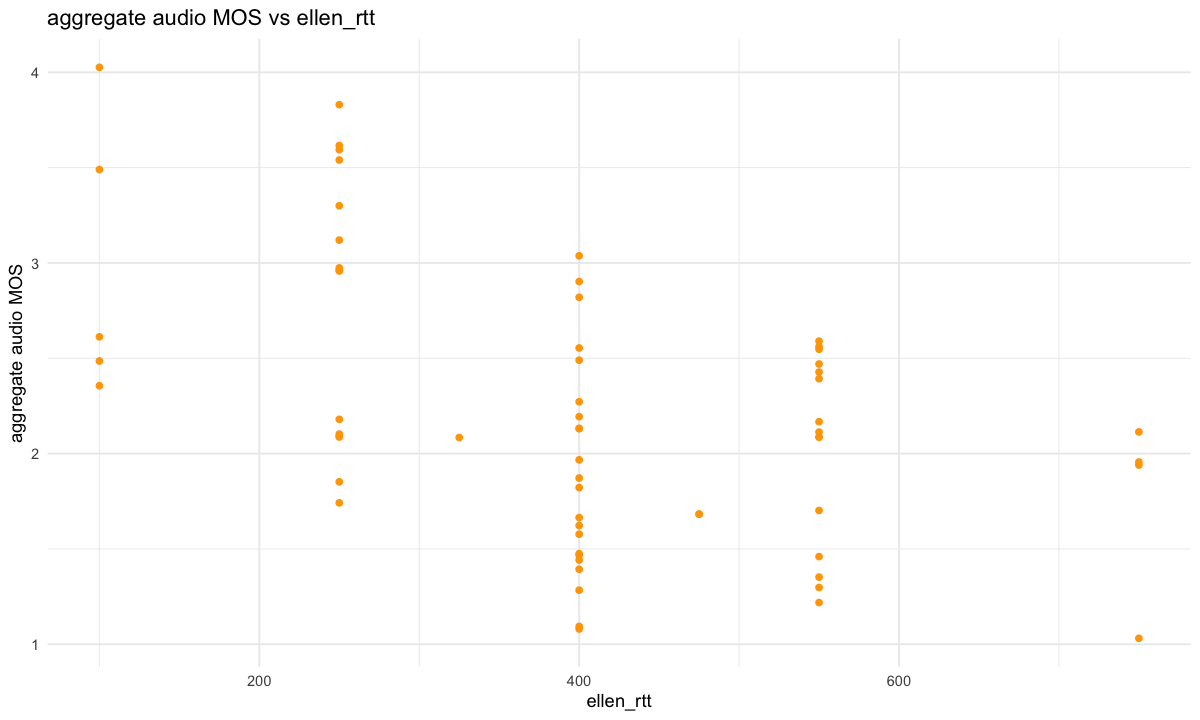

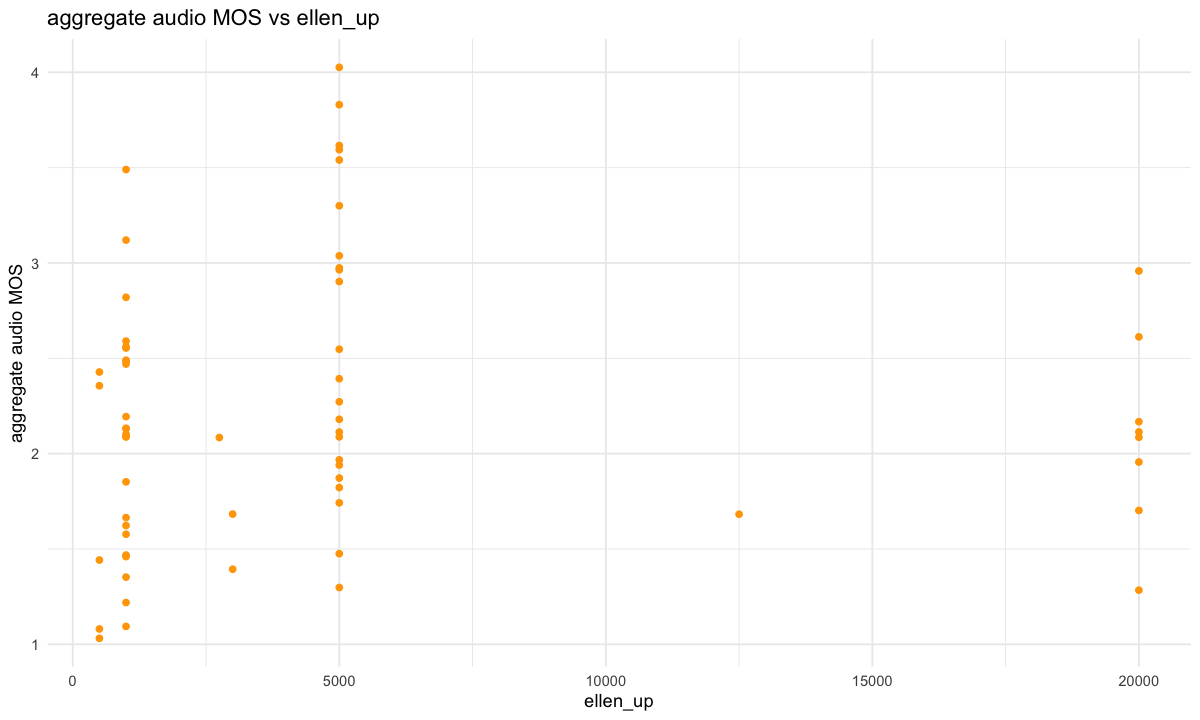

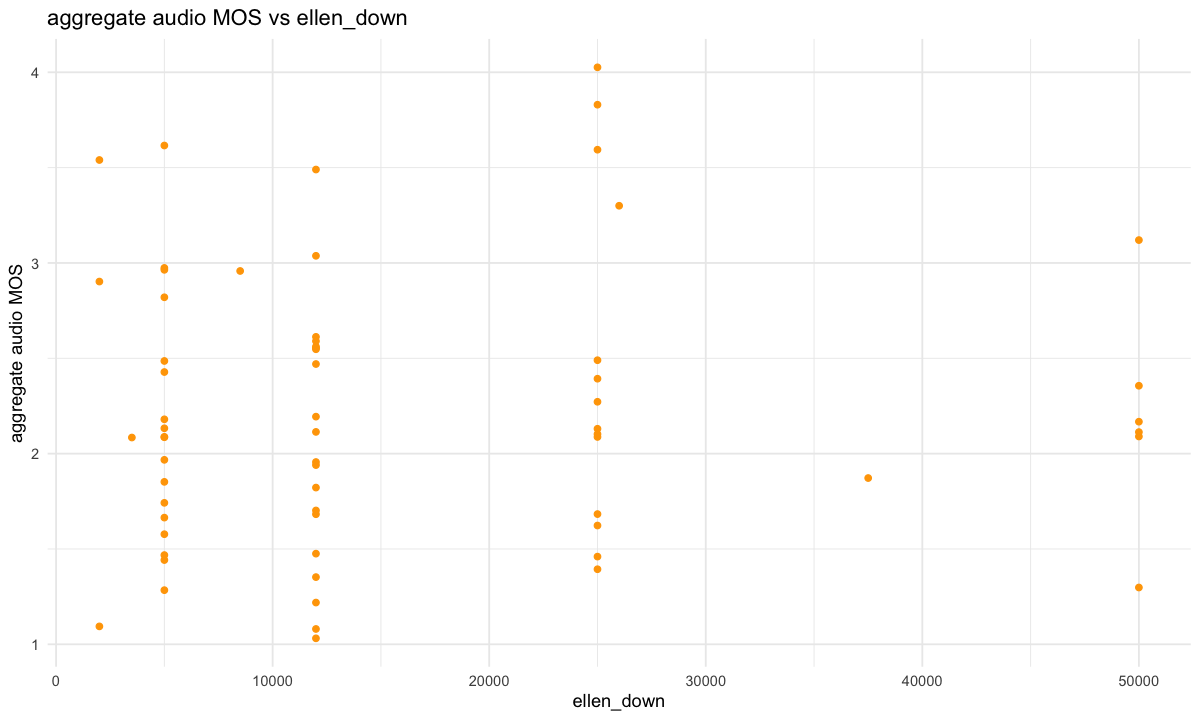

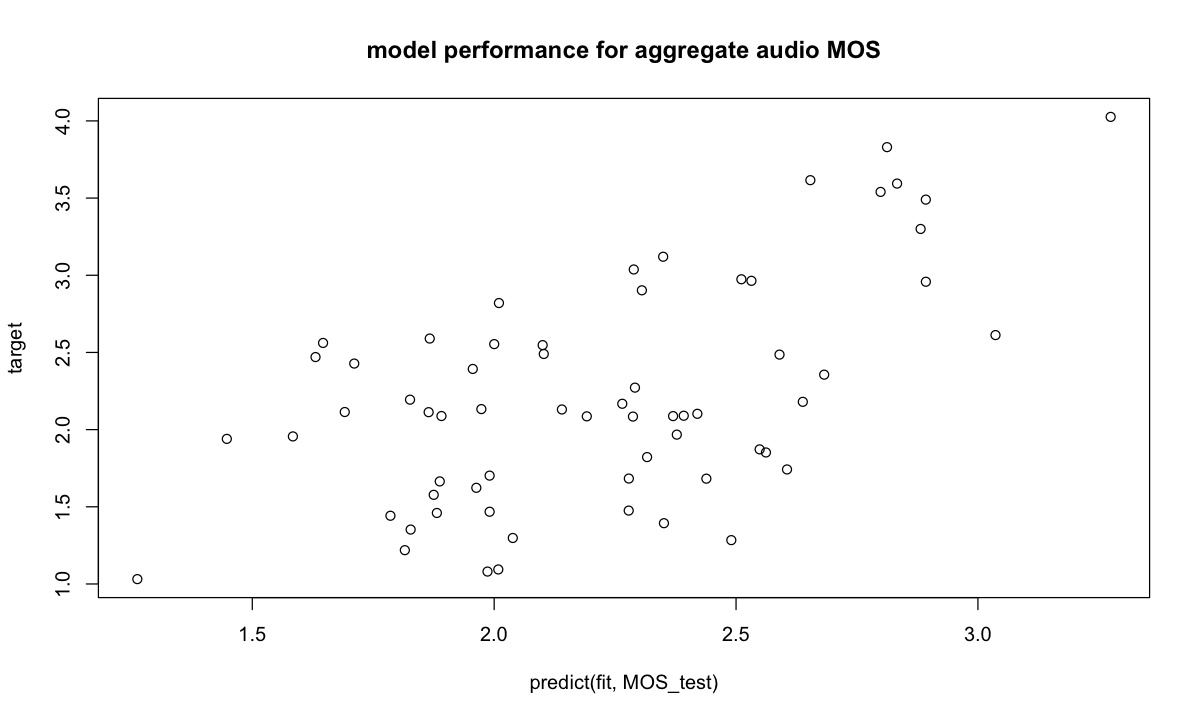

In [27]:
plot_vars_against_targ(MOS_test$agg_audio_MOS, "aggregate audio MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt + 
    log(ellen_up) + log(ellen_down) + ellen_rtt, data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47129 -0.23042  0.08639  0.32552  1.13298 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.3594792  1.1033805   1.232  0.22297    
log(aadya_up)   -0.1749406  0.0653100  -2.679  0.00964 ** 
log(aadya_down)  0.0096768  0.0729284   0.133  0.89491    
aadya_rtt       -0.0010912  0.0003696  -2.952  0.00457 ** 
log(ellen_up)    0.3152104  0.0627755   5.021 5.37e-06 ***
log(ellen_down)  0.1040818  0.0827101   1.258  0.21338    
ellen_rtt       -0.0006567  0.0004414  -1.488  0.14237    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5356 on 57 degrees of freedom
Multiple R-squared:  0.3519,	Adjusted R-squared:  0.2836 
F-statistic: 5.157 on 6 and 57 DF,  p-value: 0.0002706



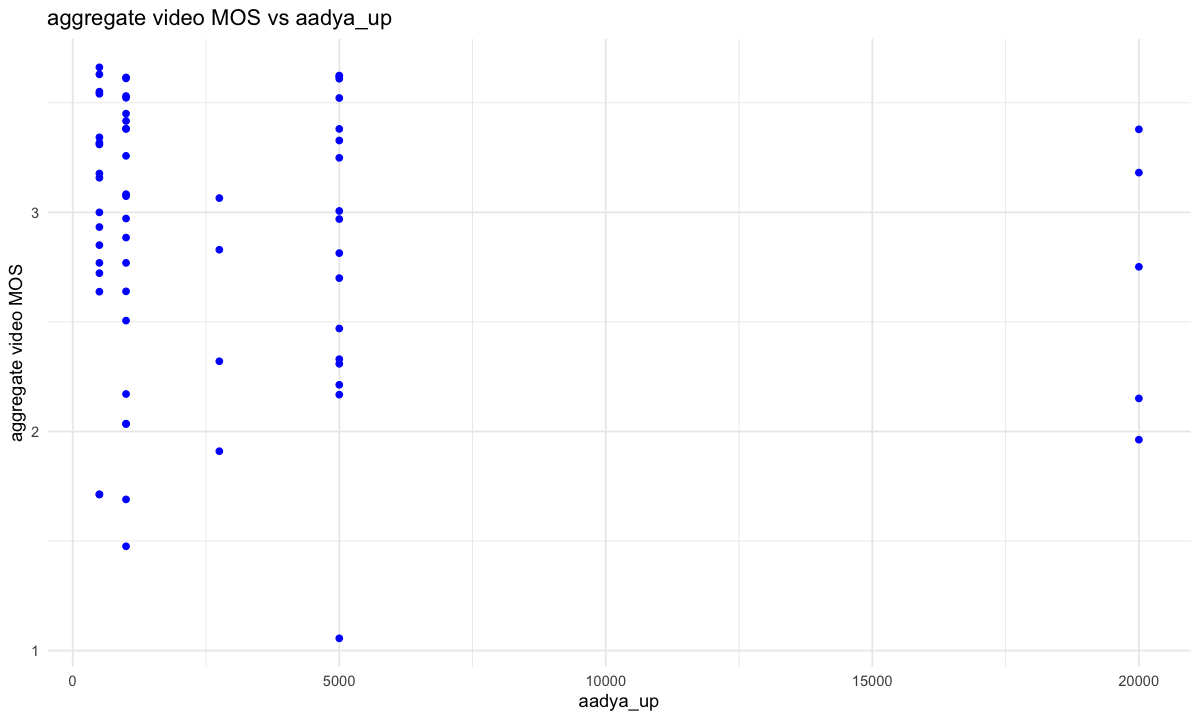

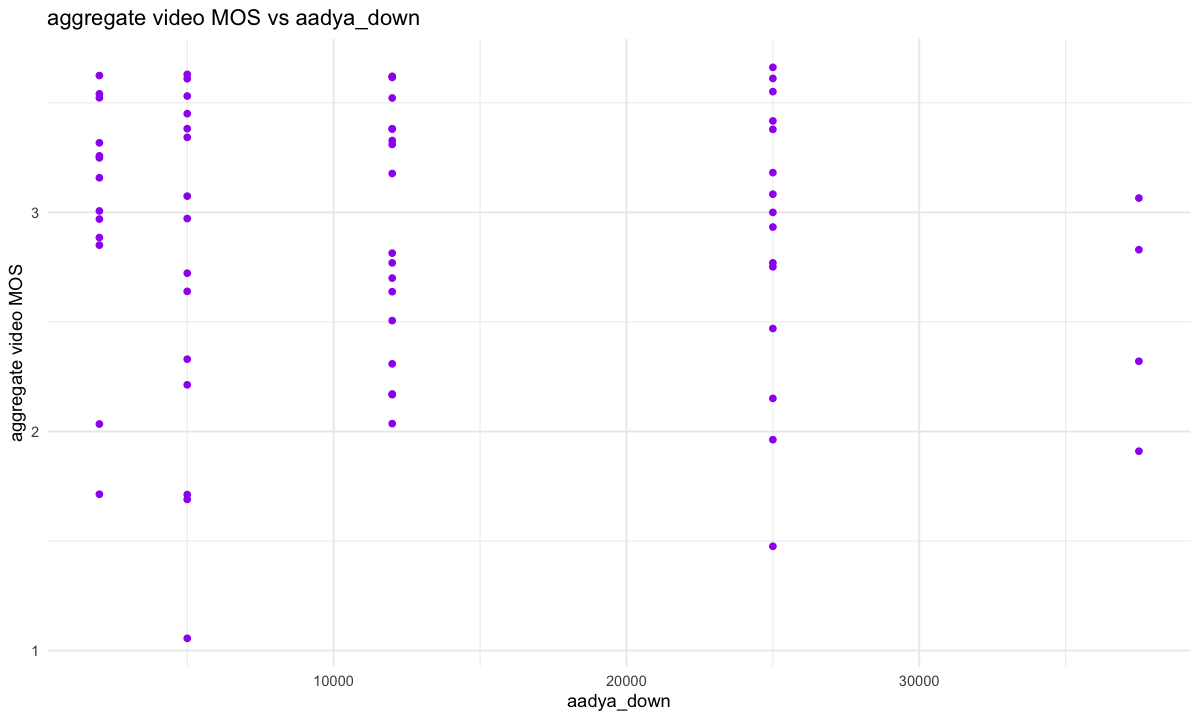

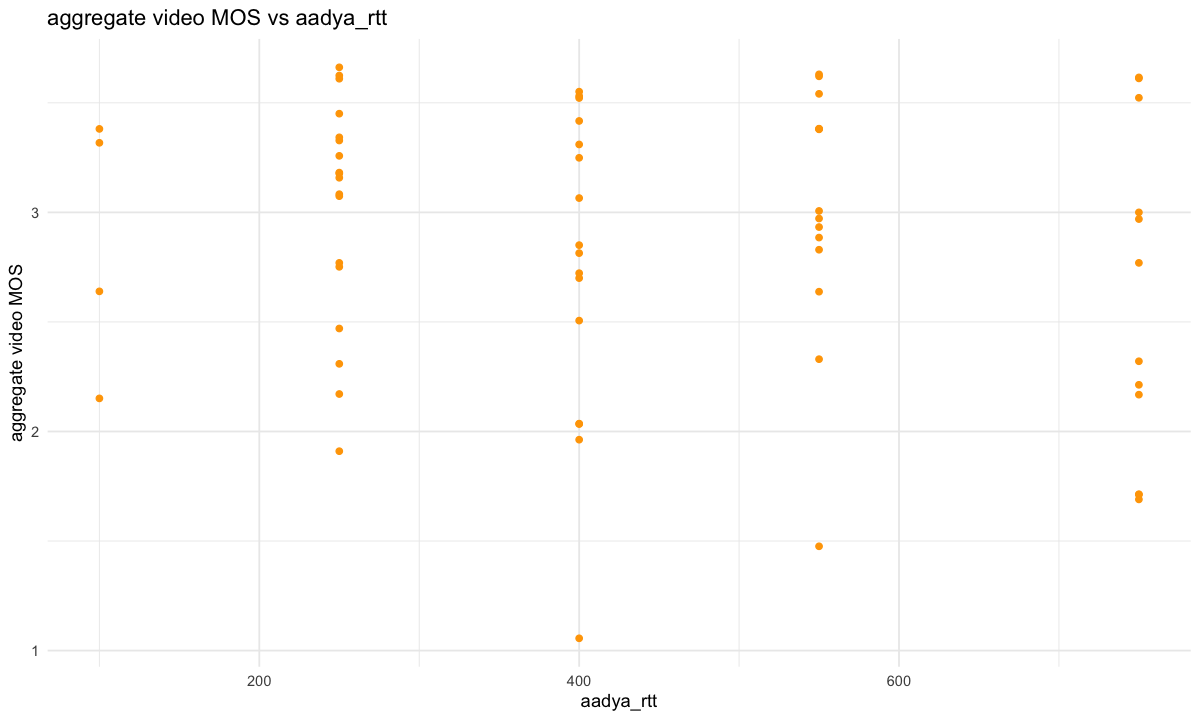

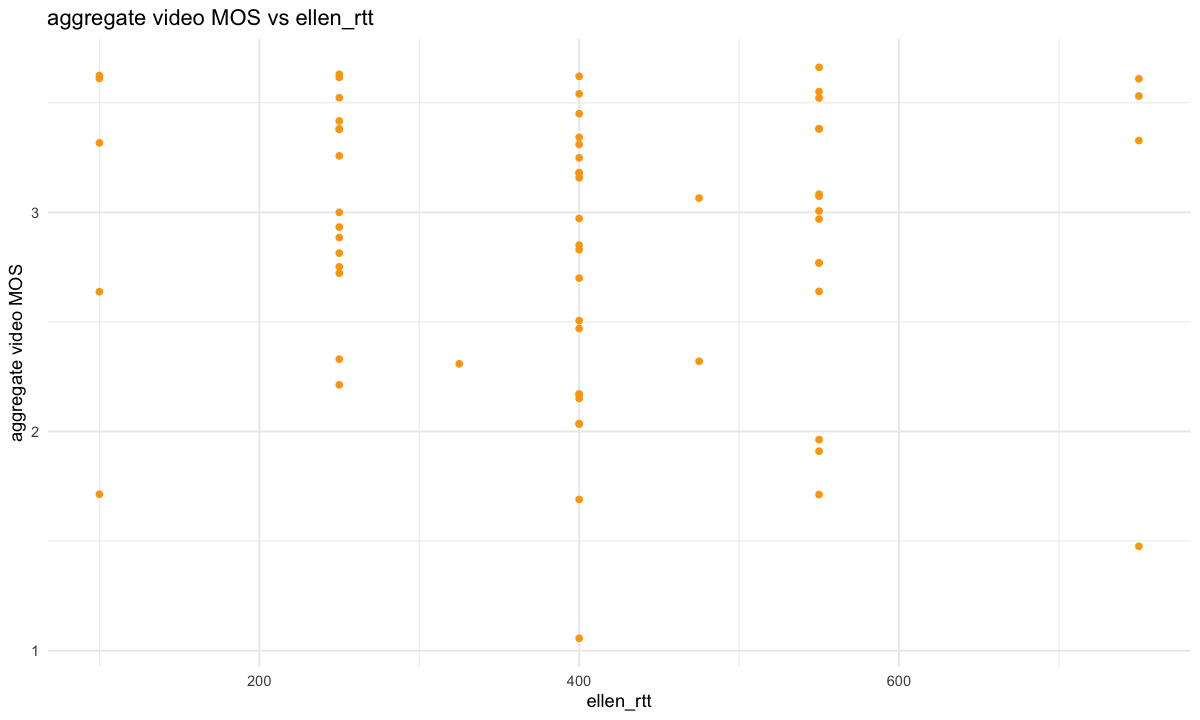

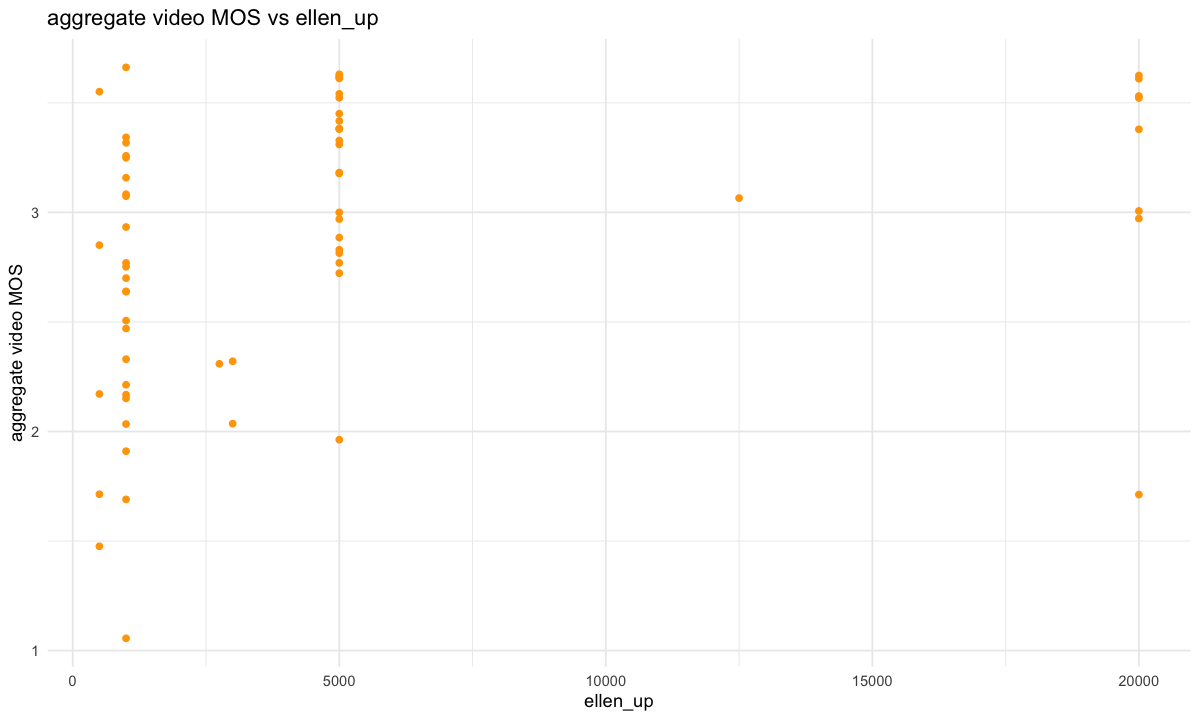

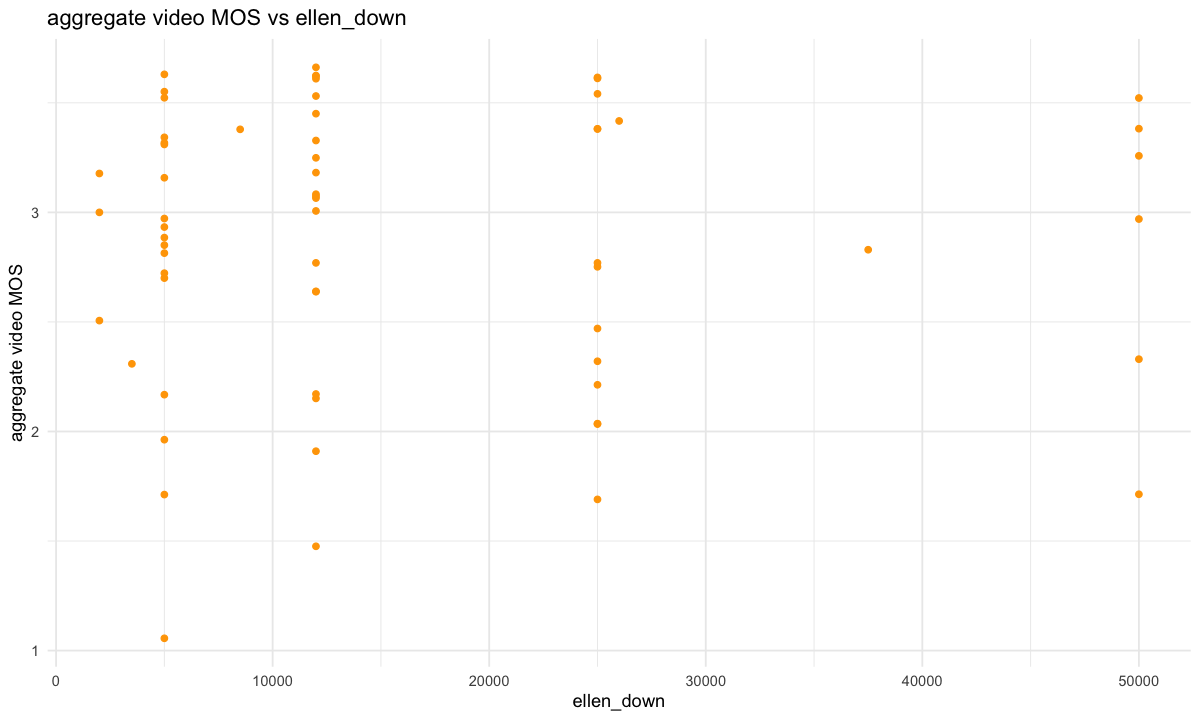

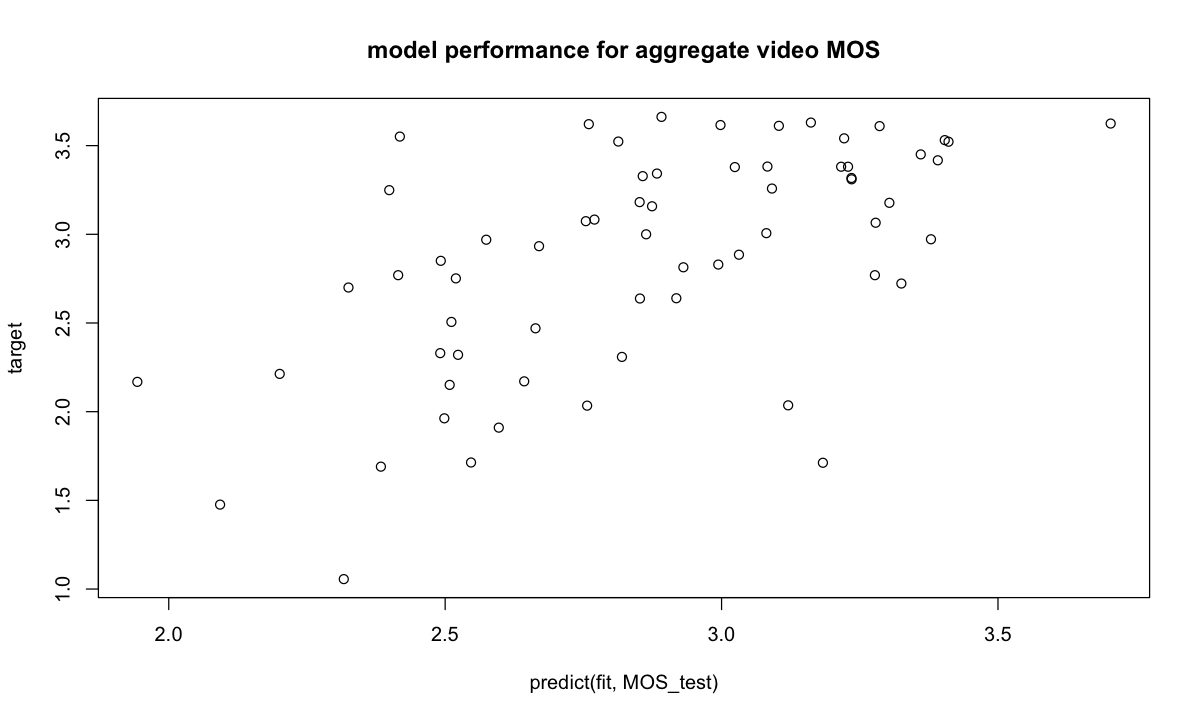

In [28]:
plot_vars_against_targ(MOS_test$agg_video_MOS, "aggregate video MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt + 
    log(ellen_up) + log(ellen_down) + ellen_rtt, data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09505 -0.35815 -0.05451  0.39410  0.88607 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.6150438  1.1115377   1.453 0.151712    
log(aadya_up)    0.0294791  0.0657928   0.448 0.655809    
log(aadya_down)  0.0930412  0.0734675   1.266 0.210512    
aadya_rtt       -0.0003091  0.0003724  -0.830 0.409976    
log(ellen_up)    0.1596971  0.0632396   2.525 0.014367 *  
log(ellen_down) -0.0565193  0.0833216  -0.678 0.500309    
ellen_rtt       -0.0015951  0.0004447  -3.587 0.000695 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5395 on 57 degrees of freedom
Multiple R-squared:  0.2568,	Adjusted R-squared:  0.1786 
F-statistic: 3.283 on 6 and 57 DF,  p-value: 0.007644



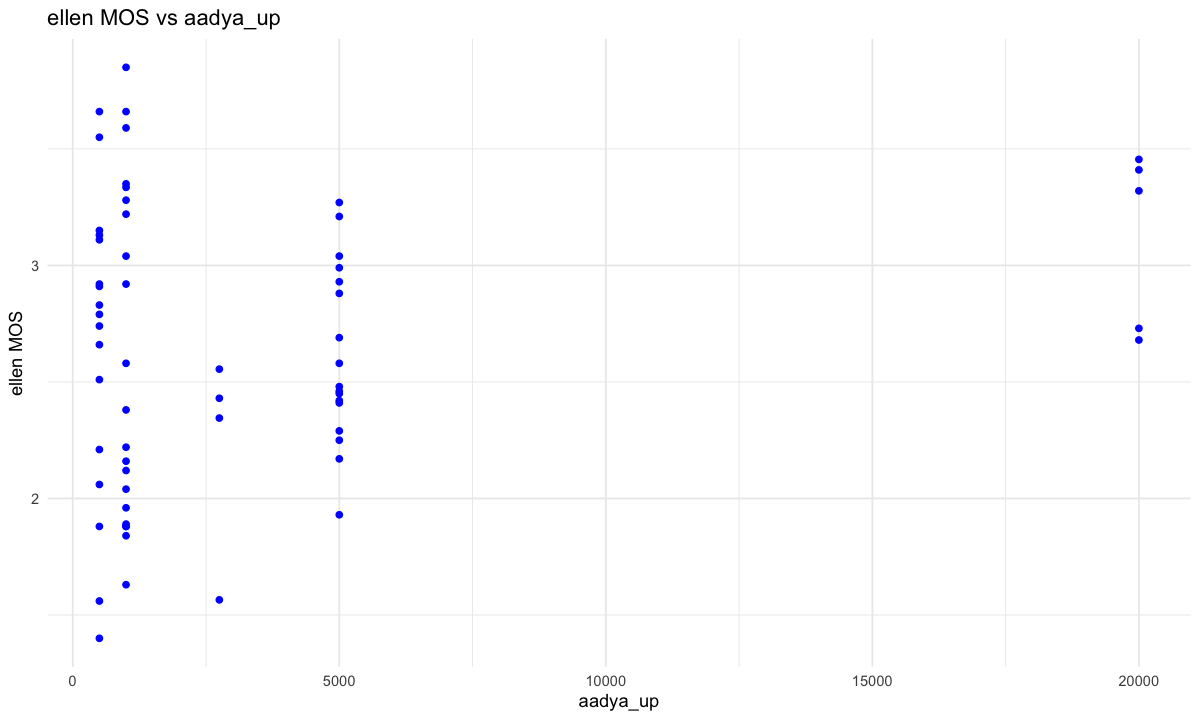

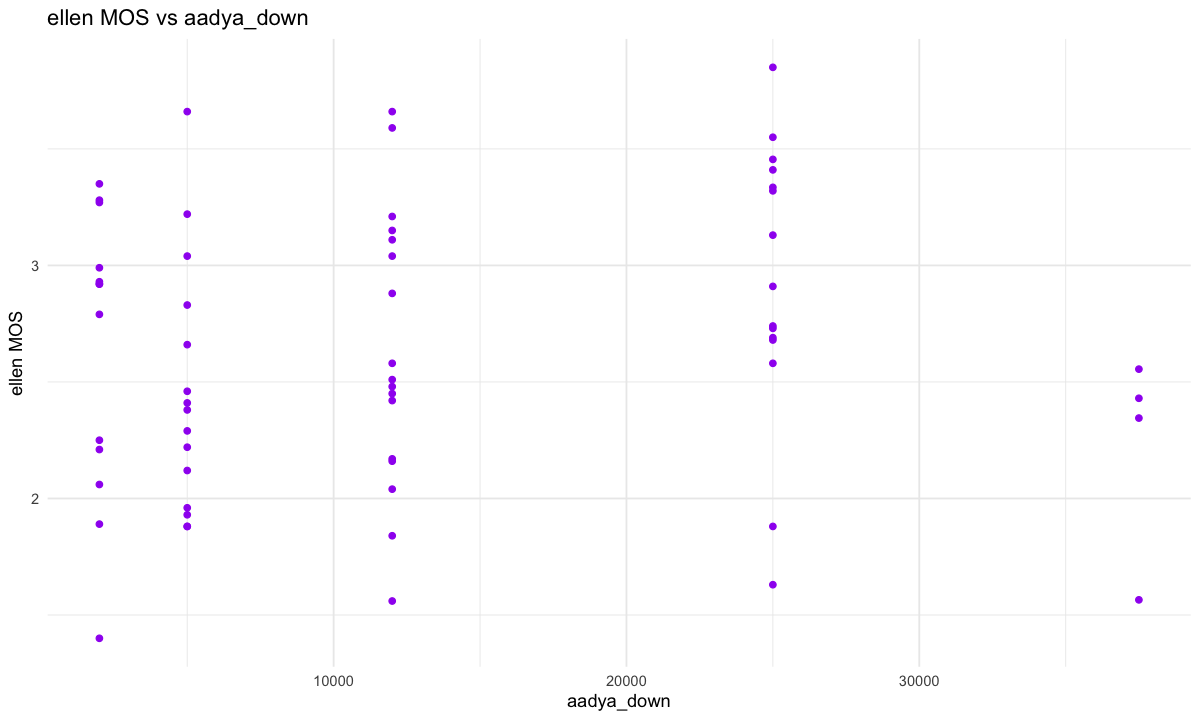

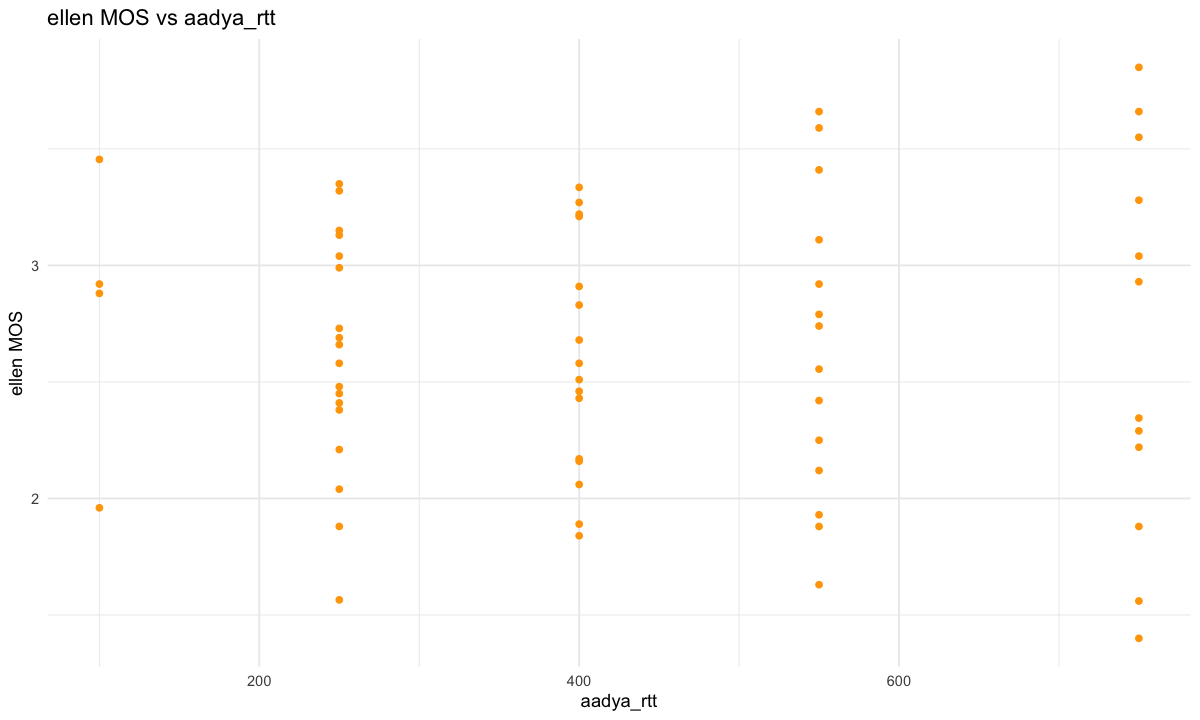

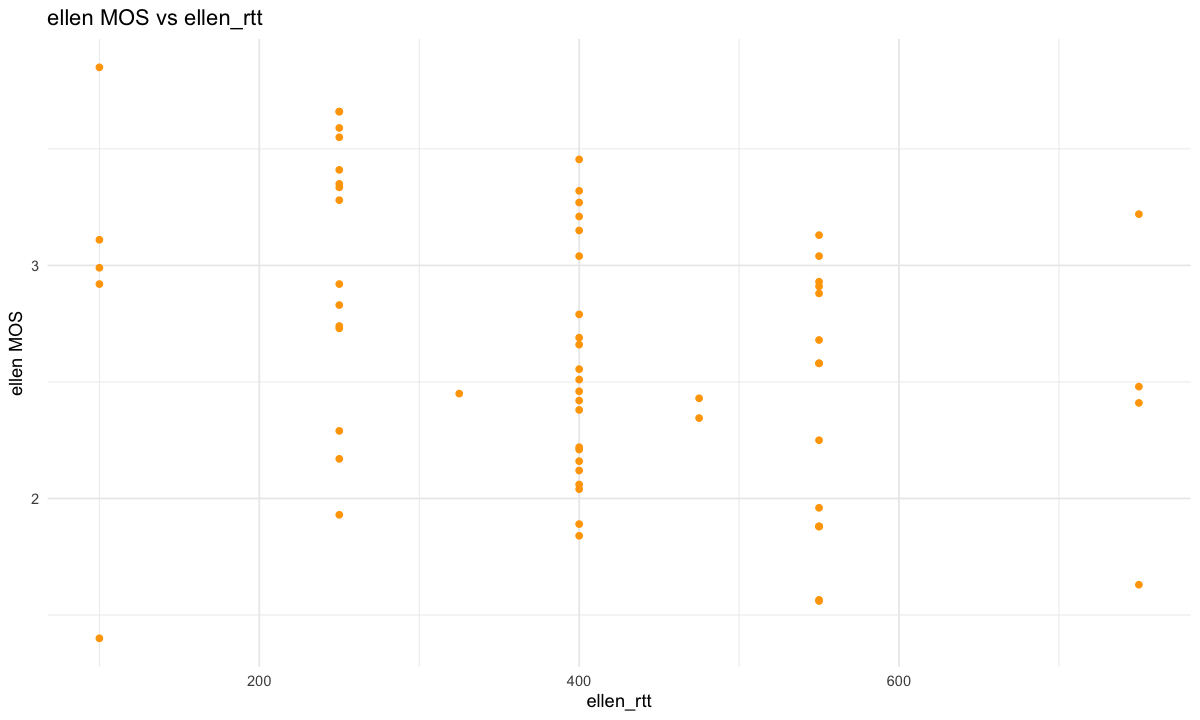

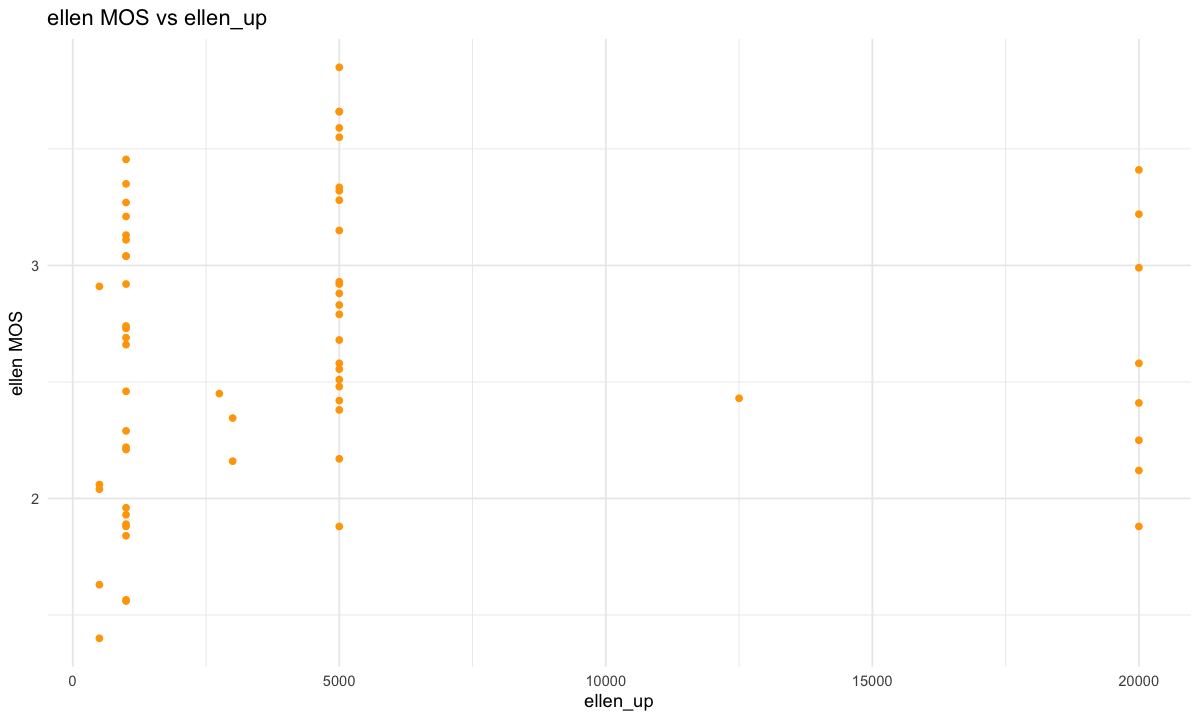

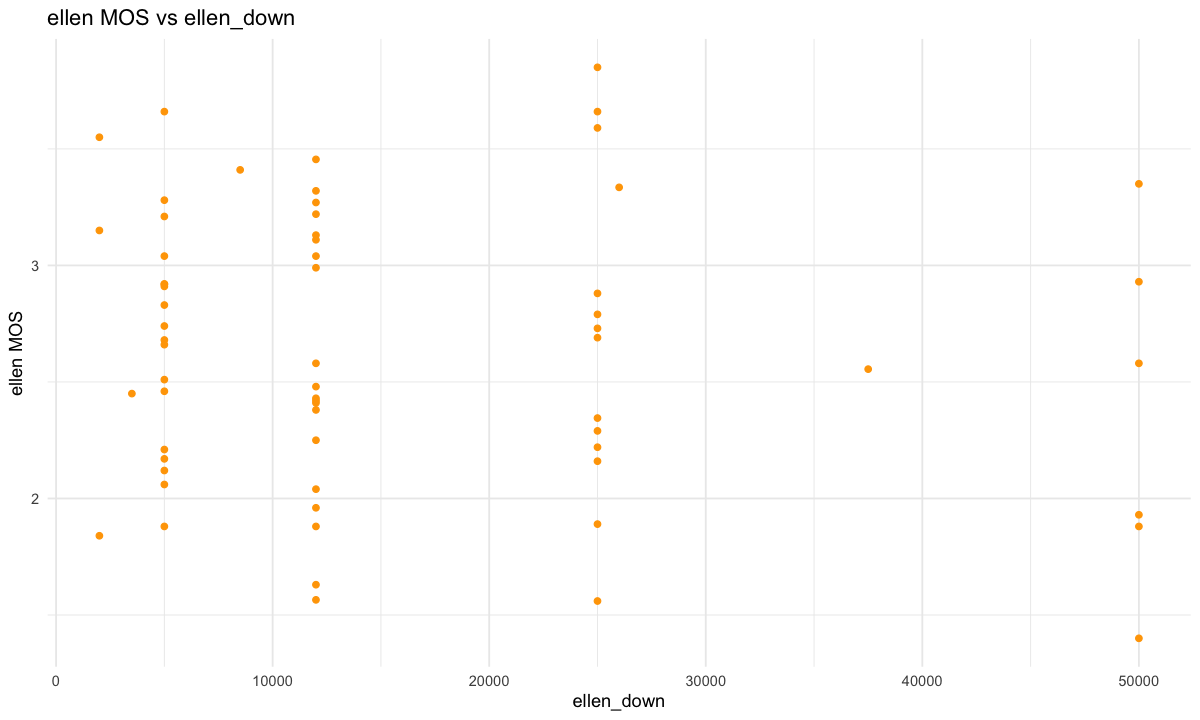

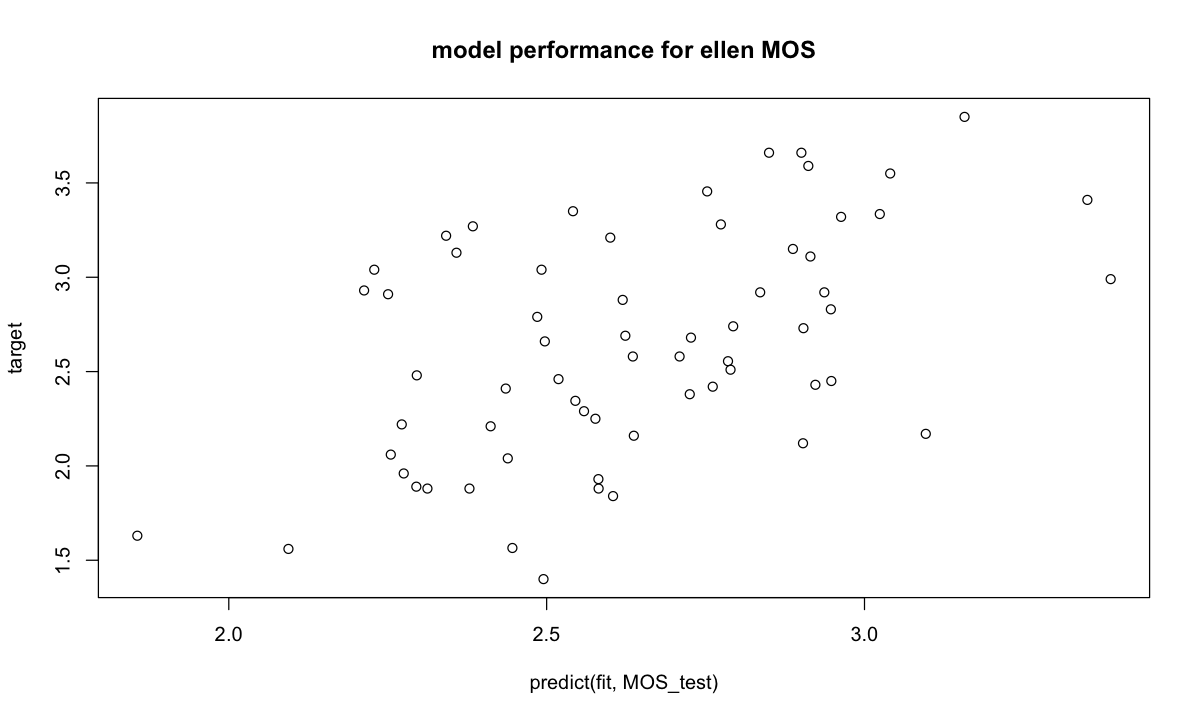

In [29]:
plot_vars_against_targ(MOS_test$ellen_MOS, "ellen MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt + 
    log(ellen_up) + log(ellen_down) + ellen_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0832 -0.3054  0.0499  0.3524  1.0035 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.3204414  1.0434213   0.307  0.75988    
log(aadya_up)   -0.1319905  0.0617609  -2.137  0.03689 *  
log(aadya_down)  0.0546656  0.0689653   0.793  0.43127    
aadya_rtt       -0.0006457  0.0003495  -1.847  0.06988 .  
log(ellen_up)    0.2952883  0.0593642   4.974 6.36e-06 ***
log(ellen_down)  0.1555763  0.0782155   1.989  0.05150 .  
ellen_rtt       -0.0012508  0.0004174  -2.996  0.00404 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5065 on 57 degrees of freedom
Multiple R-squared:  0.3607,	Adjusted R-squared:  0.2934 
F-statistic: 5.359 on 6 and 57 DF,  p-value: 0.0001916



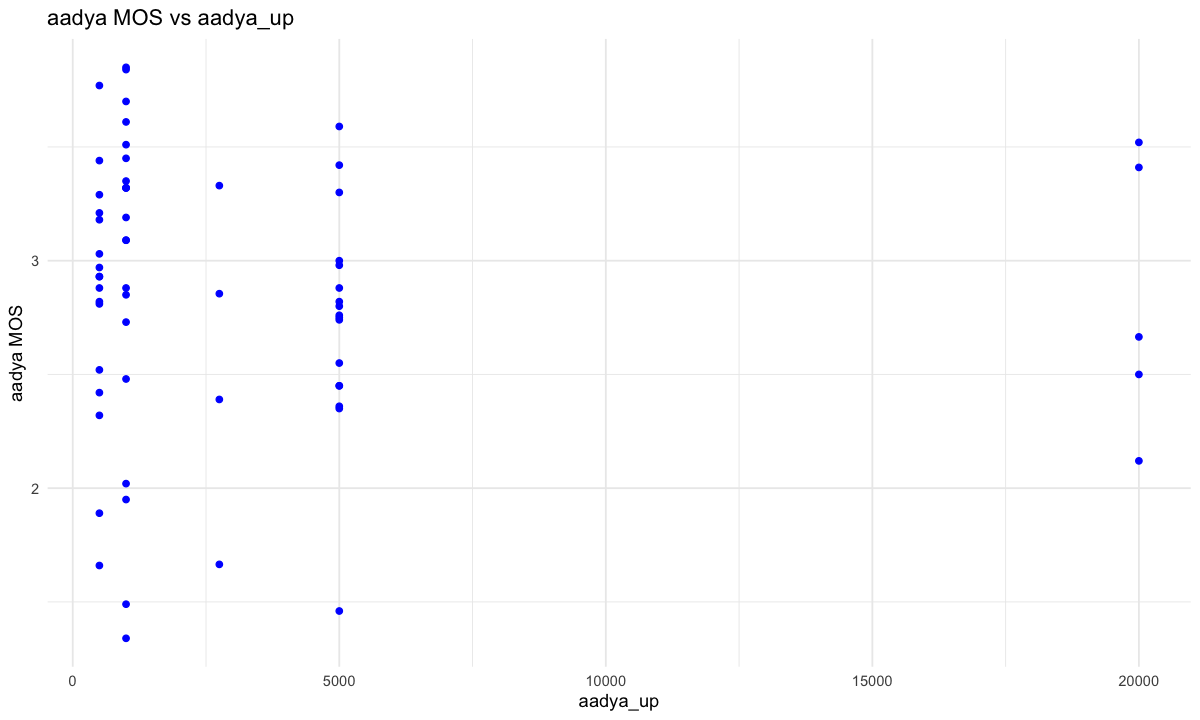

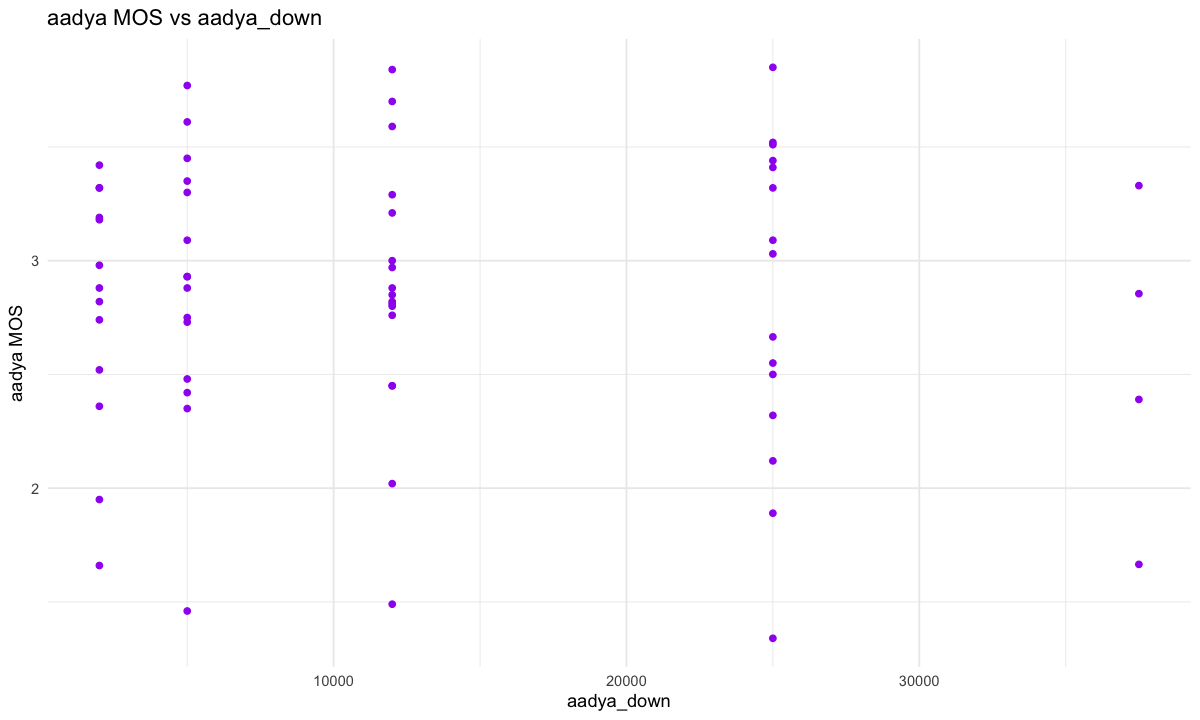

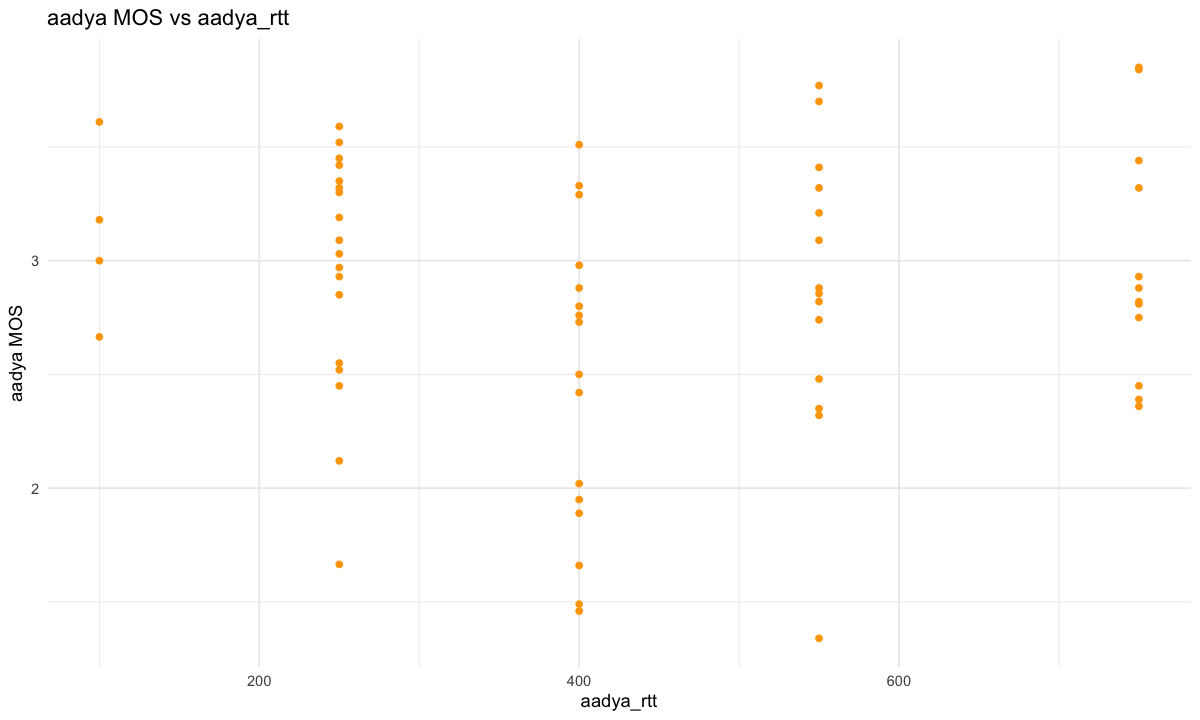

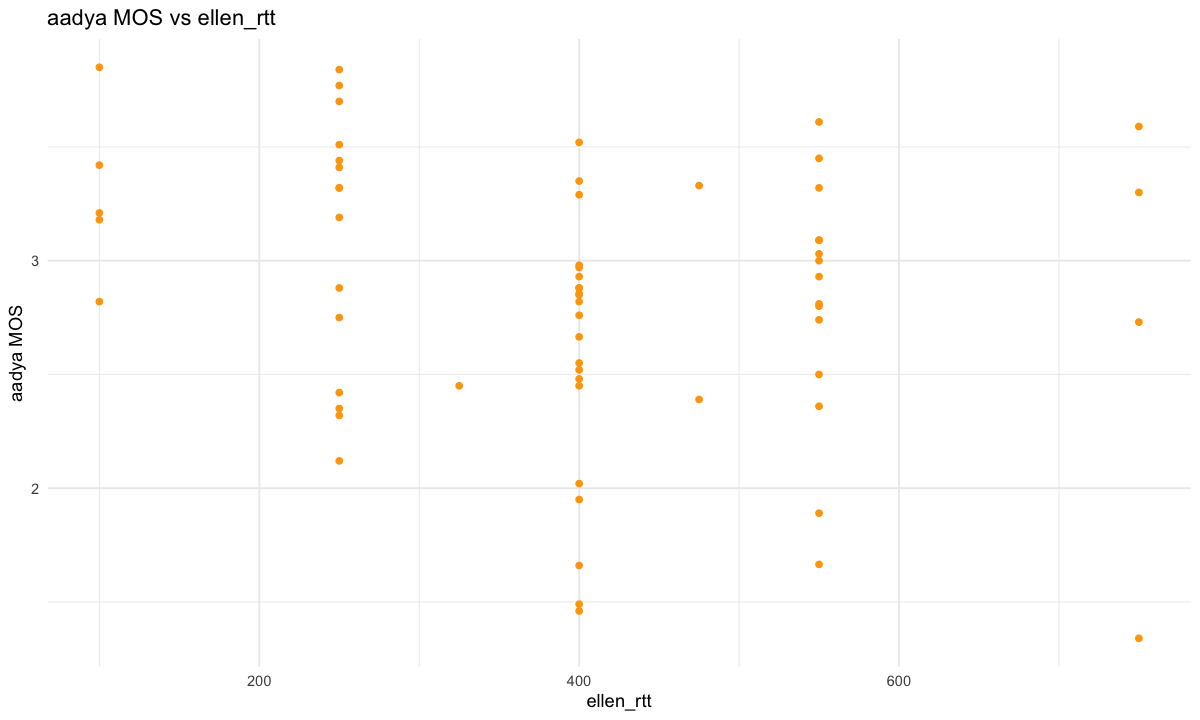

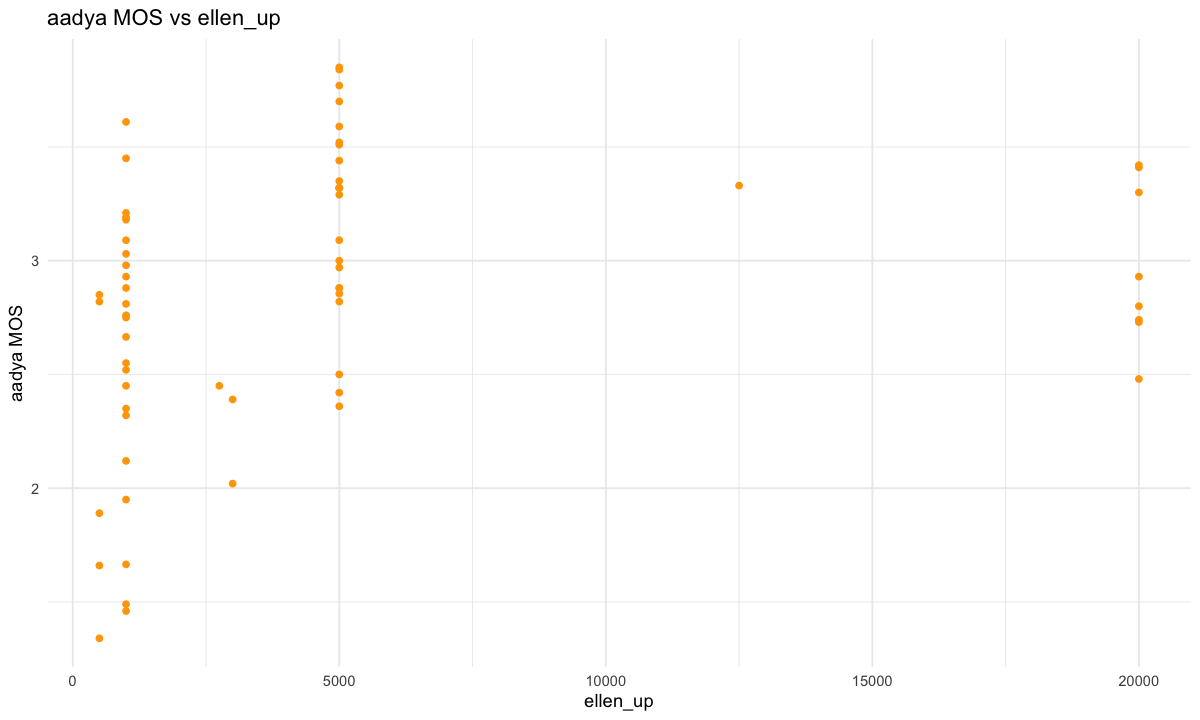

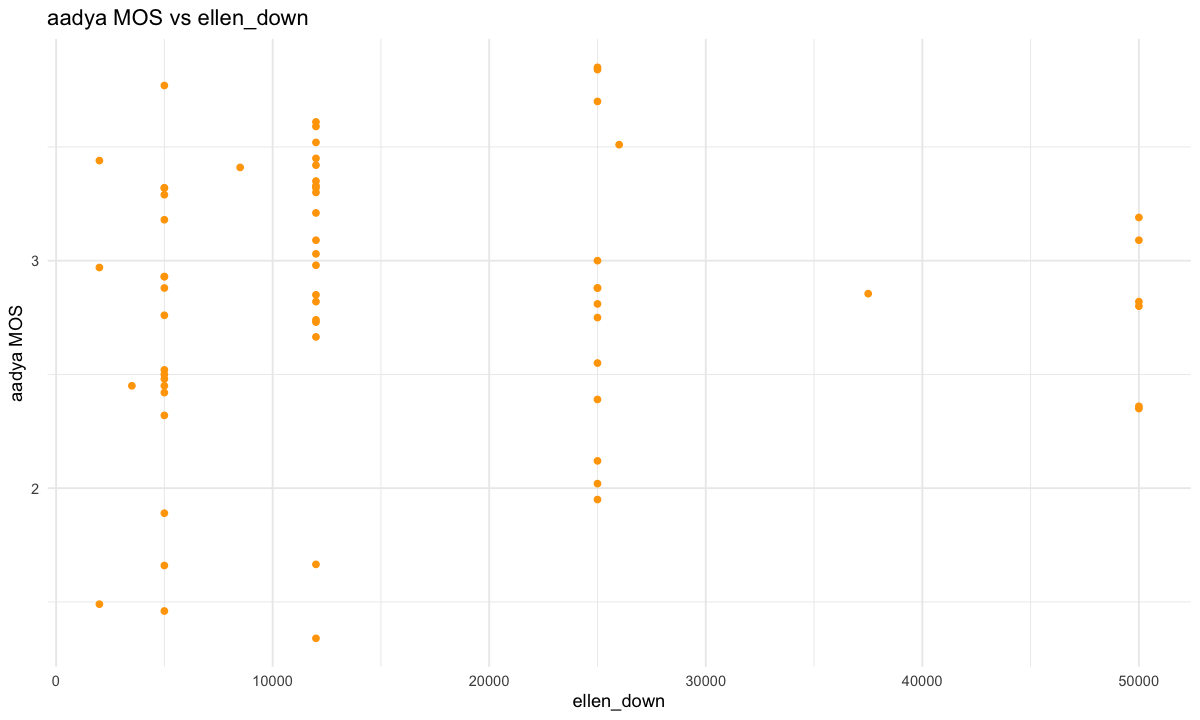

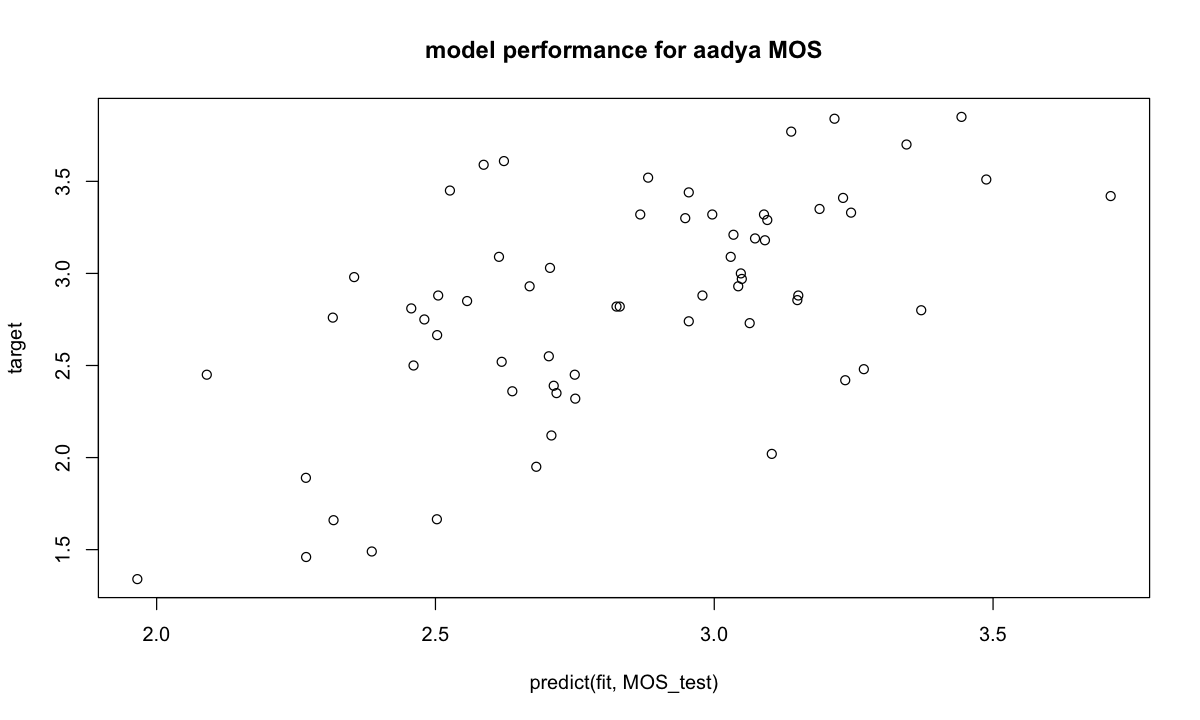

In [30]:
plot_vars_against_targ(MOS_test$aadya_MOS, "aadya MOS")